# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [4]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



# Important information from Understanding Features
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## The feature "duration" was dropped from the database

# Important Information from bank-additional-names.txt
1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).

I will add a new feature named year. I want to see if I can get some useful insights of it.



In [962]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

months_arr = []
for i in range(df.shape[0]):
    if months_arr != [] and months_arr[-1][1] == df.iloc[i]["month"]:
        continue
    else:
        months_arr.append([i, df.iloc[i]["month"]])

months_arr = np.array(months_arr)
print(months_arr)
df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))



[['0' 'may']
 ['7763' 'jun']
 ['12137' 'jul']
 ['18822' 'aug']
 ['23997' 'oct']
 ['24064' 'nov']
 ['27680' 'dec']
 ['27690' 'mar']
 ['27972' 'apr']
 ['30430' 'may']
 ['36224' 'jun']
 ['36939' 'jul']
 ['37117' 'aug']
 ['37887' 'sep']
 ['38154' 'oct']
 ['38601' 'nov']
 ['38958' 'dec']
 ['39130' 'mar']
 ['39394' 'apr']
 ['39568' 'may']
 ['39780' 'jun']
 ['40009' 'jul']
 ['40320' 'aug']
 ['40553' 'sep']
 ['40856' 'oct']
 ['41060' 'nov']]


What we’ve got:

<table>
<tr>
<td>
2008 →  
</td>
<td>
 [0..27690)
</td>
</tr>
<tr>
<td>
2009 → 
</td>
<td>
[27690..39130)
</td>
</tr>
<tr>
<td>
2010 → 
</td>
<td>
[39130..41188)</td>
</tr>
</table>


Let’s hardcode the year feature based on these indexes:
<code>
df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))
</code>

# Distribution of outcome in full dataset per year

We can see in the following graph the distribution of the outcome per year

It is clear that there are more values right at the beginning of where they started gathering the data.

This will show a clear imbalance in the data.

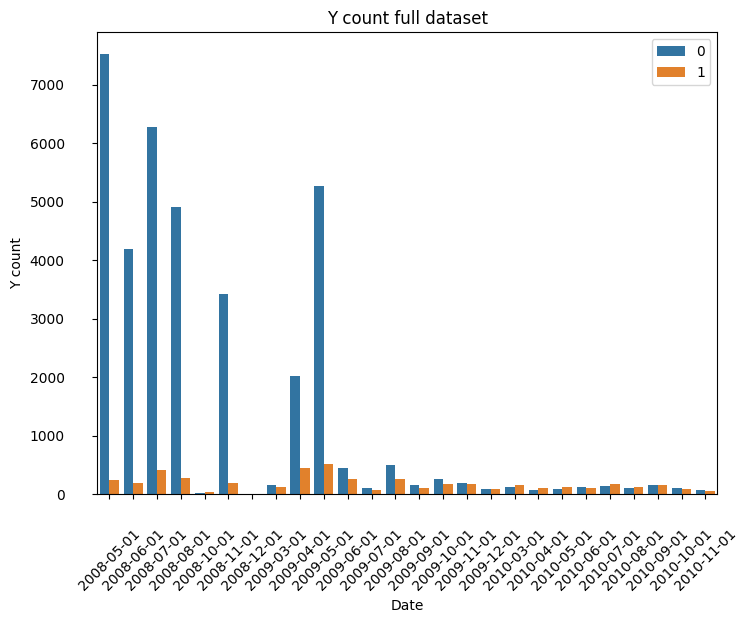

In [970]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

df = df.drop("duration",axis=1)

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Map month abbreviations to numbers
df['month_num'] = df['month'].map(month_map)

# Create 'date' feature with day=1
df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))
df = df.drop({"month","month_num","year"},axis=1)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Group by year and calculate value counts
y_dist = df.groupby('date')['y'].value_counts()


# Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='date', hue='y', data=df)
plt.xlabel('Date')
plt.ylabel('Y count')
plt.title('Y count full dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()
plt.savefig('images/Totalyperyear.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

# Distribution of outcome in full dataset per year

In the following graphs, we can see the distribution of the outcome variable per categorical featural and per year.

It is quite surprising the amount of data that was gathered from May 2008 till May 2009. 

Although, it is not clear if the data was not gathered or the campaign for selling the financial product was smaller.

However, if we look at the graph above, we can see that there is a more even distribution of the outcome.

I was tempted to use the data from May 2009 onwards. However, that could cause overfitting, so I decided not to use it and use the full dataset instead using a technique to balance the outcome.

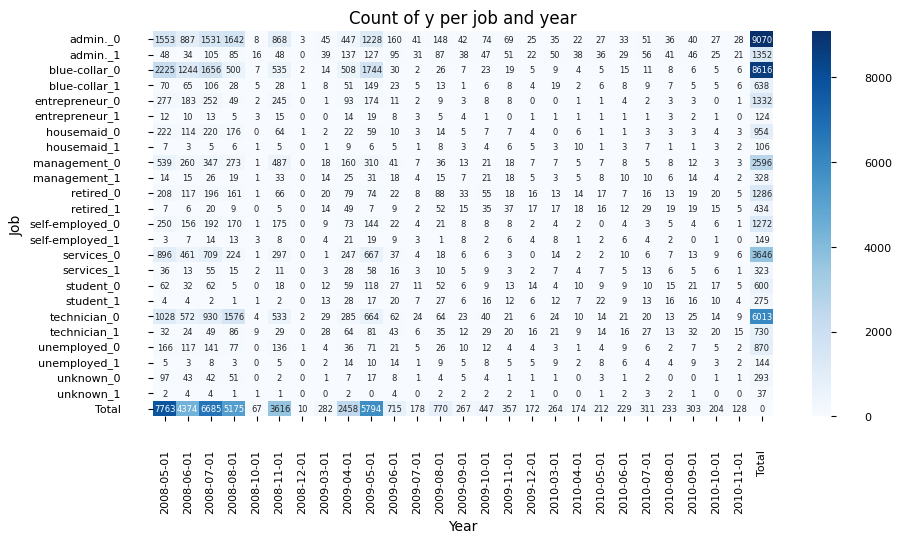

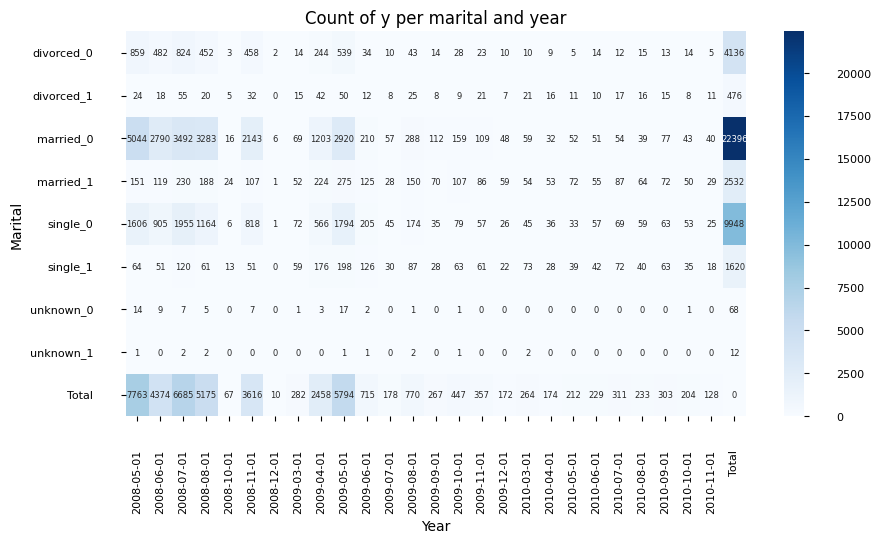

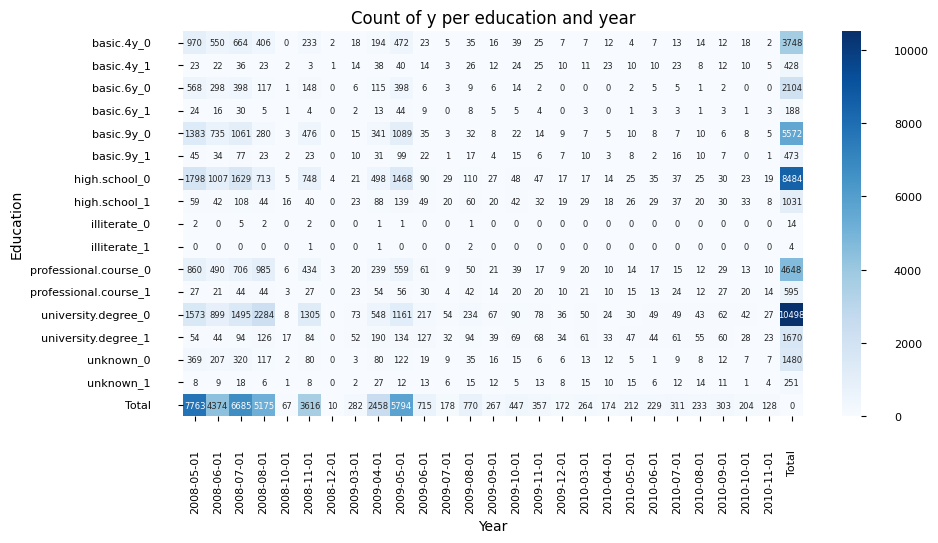

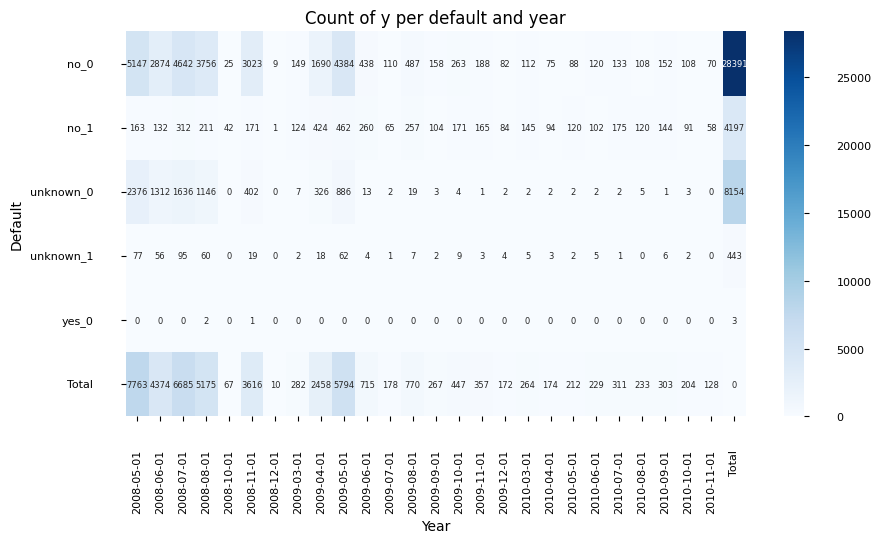

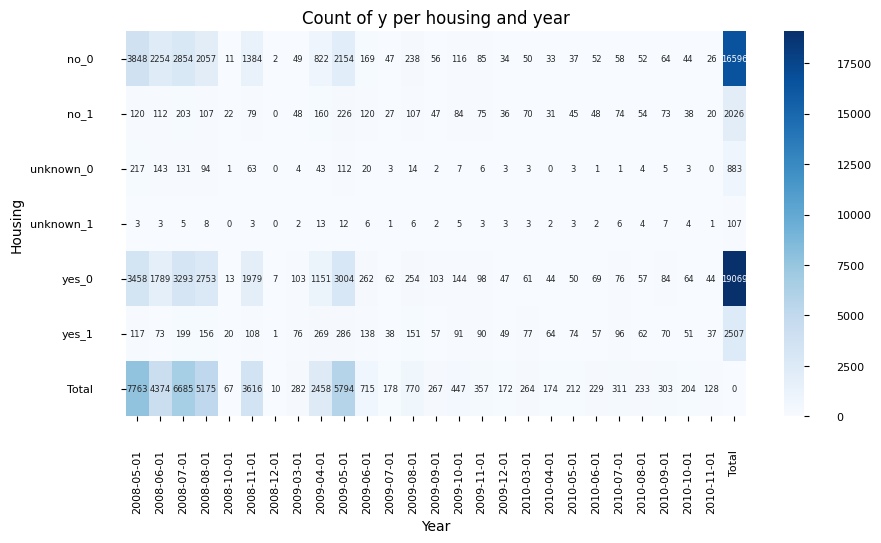

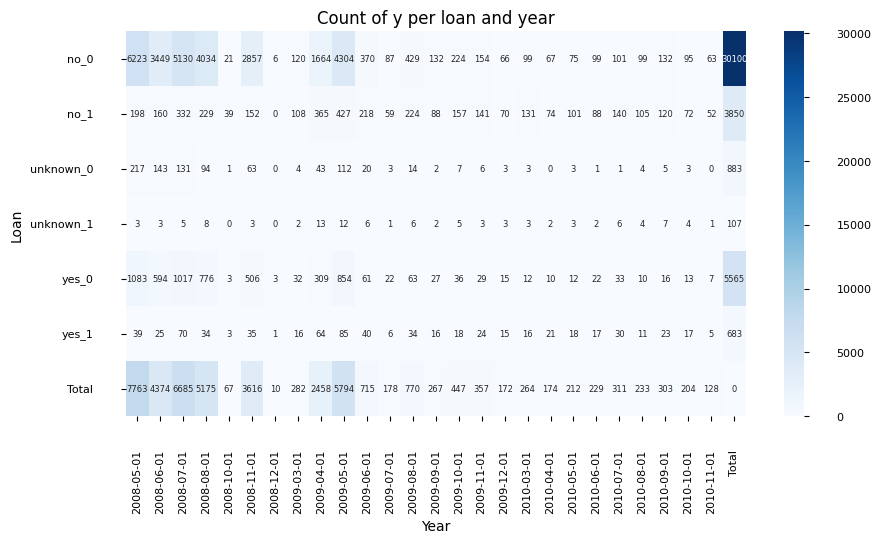

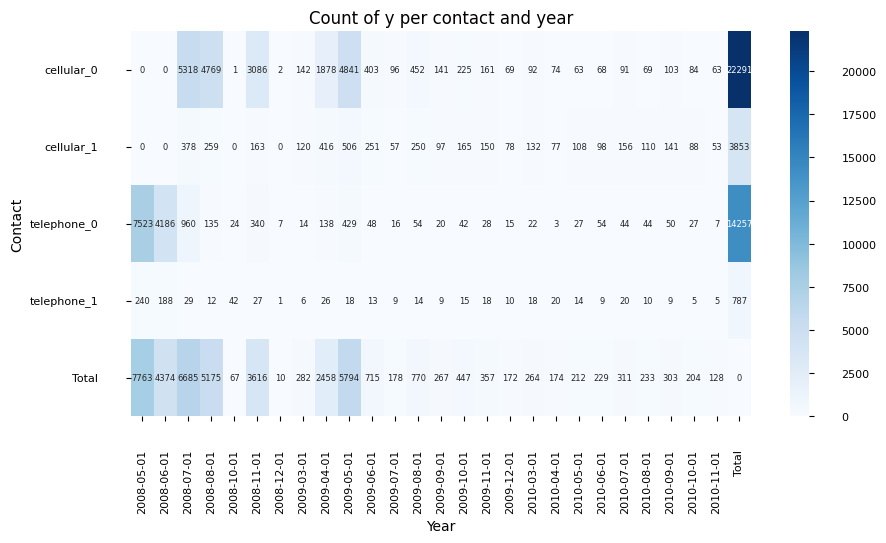

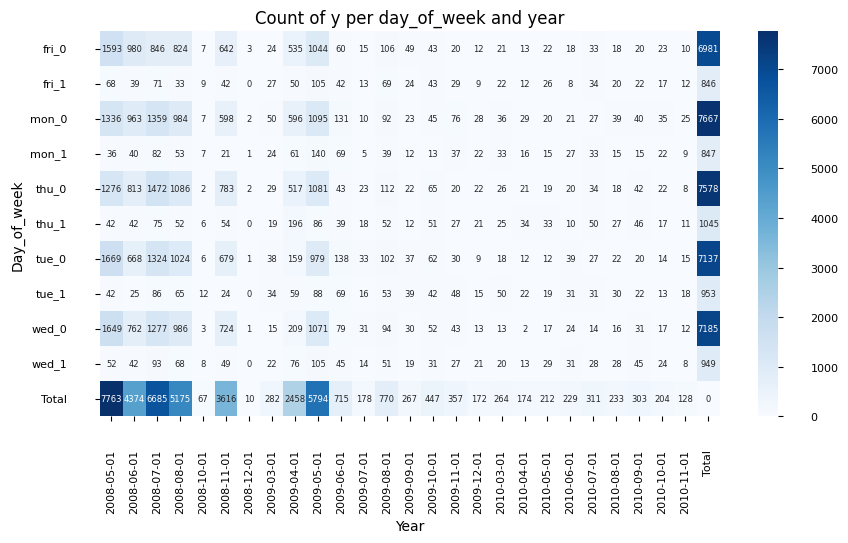

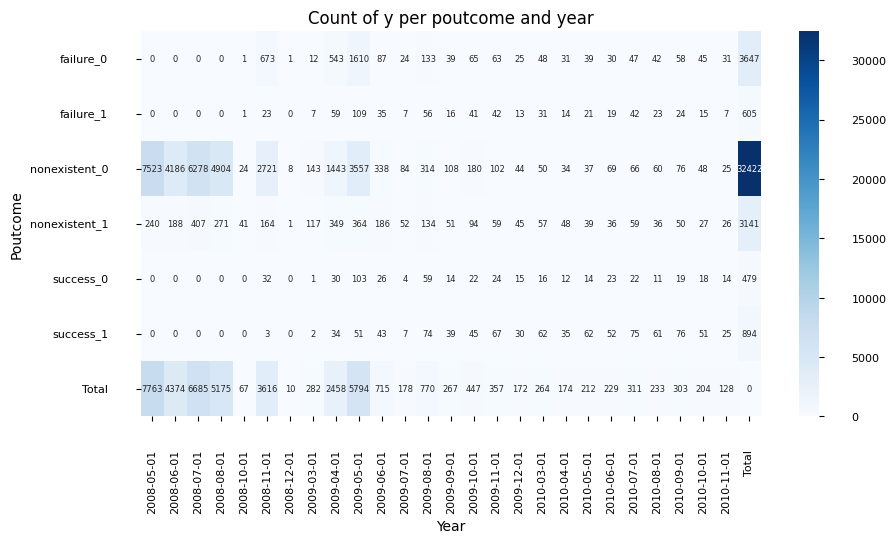

In [768]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

# Map month abbreviations to numbers
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

# Create 'date' feature
df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df = df.drop(["month", "month_num", "year"], axis=1)

# Map target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Get categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Create heatmaps for each categorical feature
for feature in categorical_features:
    if feature != 'date':
        df[feature + '_y'] = df.apply(lambda row: f"{row[feature]}_{row['y']}", axis=1)
        
        # Pivot the data
        pivot_table = df.pivot_table(index='date', columns=feature + '_y', values='y', aggfunc='count', fill_value=0).T
        
        # Add totals per year and feature
        totals_year = pivot_table.sum(axis=1)
        totals_feature = pivot_table.sum(axis=0)
        pivot_table.loc['Total'] = totals_feature
        pivot_table['Total'] = totals_year
        
        # Plot heatmap
        plt.rcParams['xtick.labelsize'] = 8
        plt.rcParams['ytick.labelsize'] = 8
        plt.figure(figsize=(10, 5))
        pivot_table = pivot_table.fillna(0)  # Replace NaN with 0
        pivot_table = pivot_table.replace([np.inf, -np.inf], 0)  # Replace infinity with 0
        pivot_table = pivot_table.astype(int)        
        sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d', annot_kws={'fontsize': 6})            
        
        plt.title(f'Count of y per {feature} and year')
        plt.xlabel('Year')
        plt.ylabel(feature.capitalize())
        plt.yticks(rotation=0)  
        plt.savefig(f'images/yper{feature}andyear.png')    
        plt.show()

# Distribution of outcome in full dataset per year in percentages

It is more clear to see in this graphs the distribution of the outcome variable across all features.

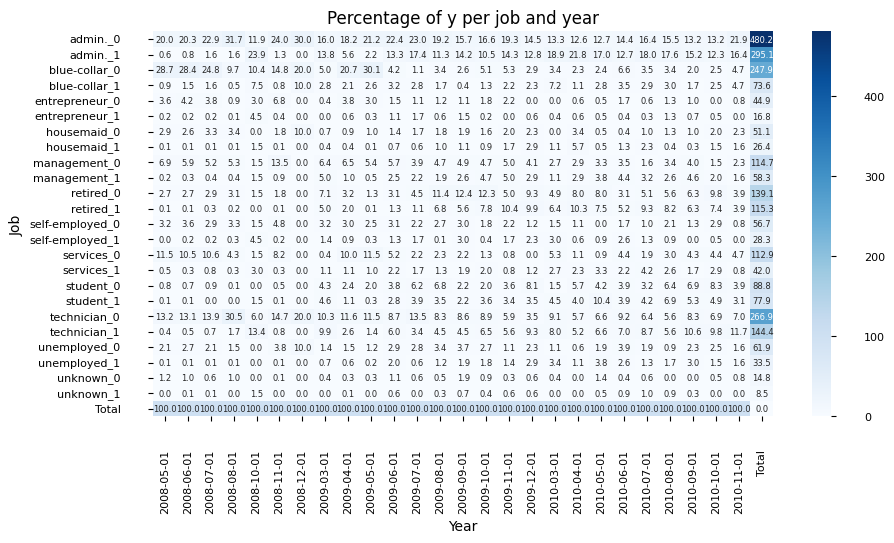

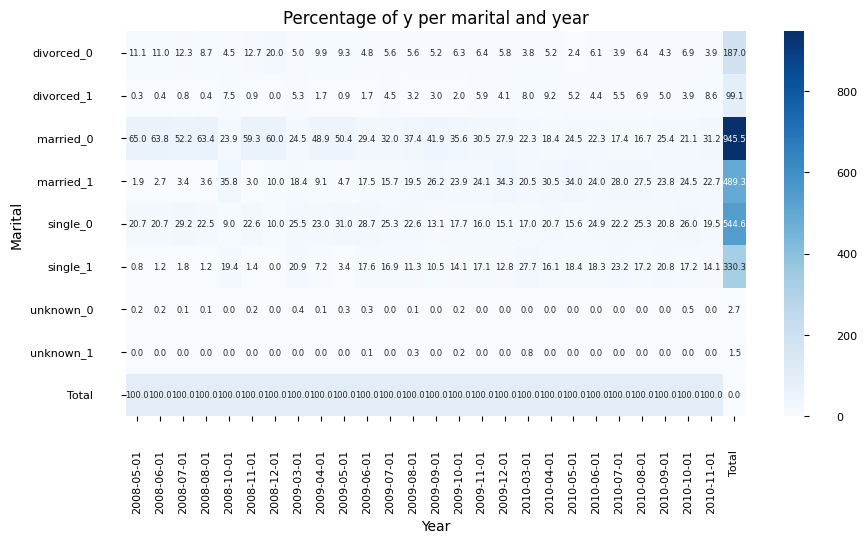

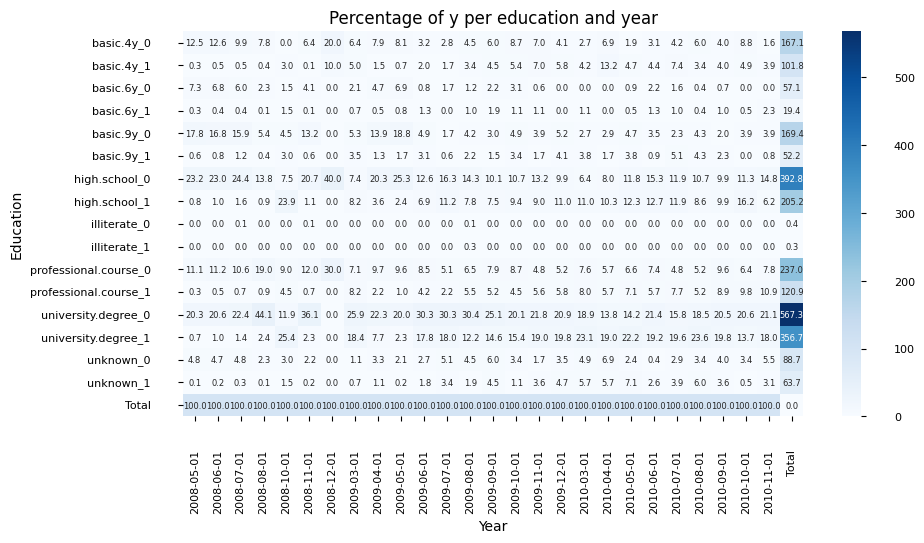

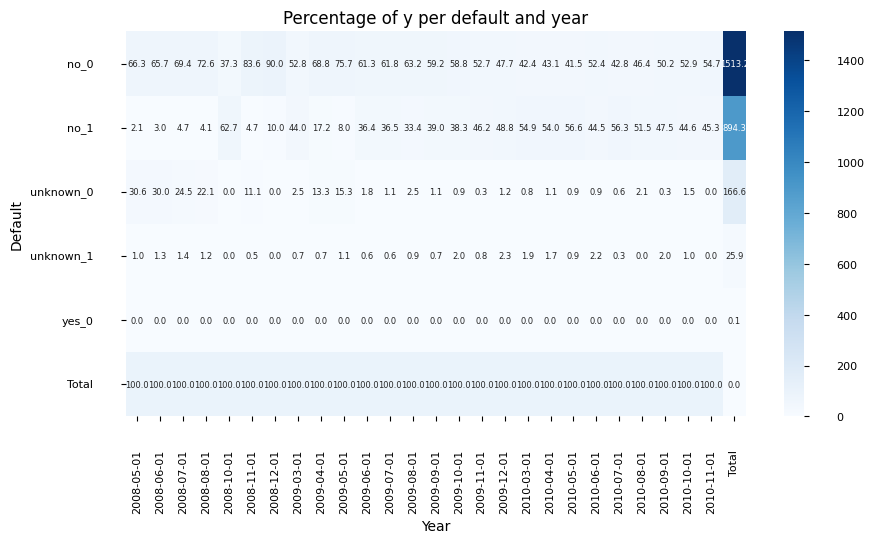

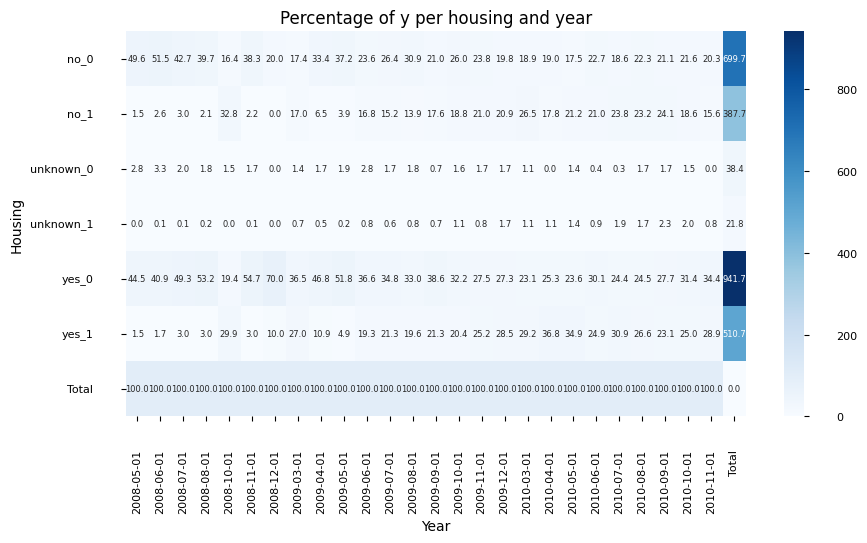

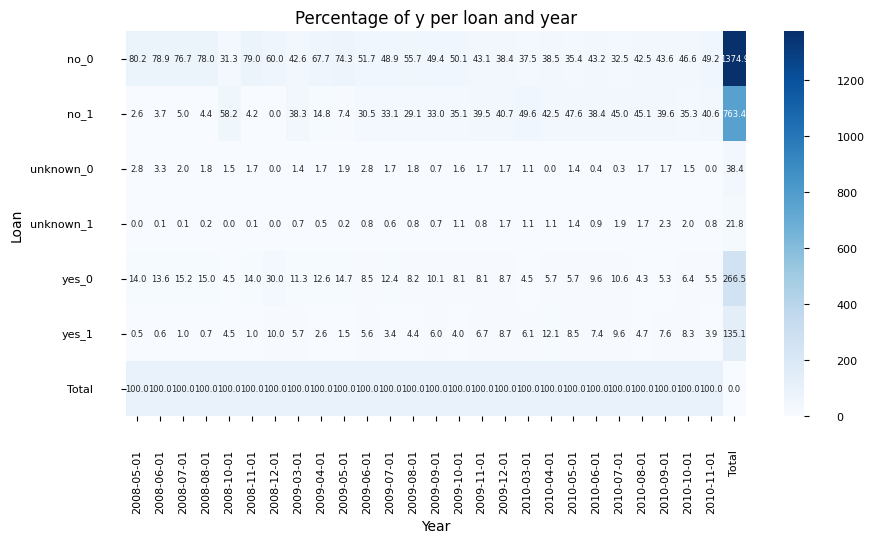

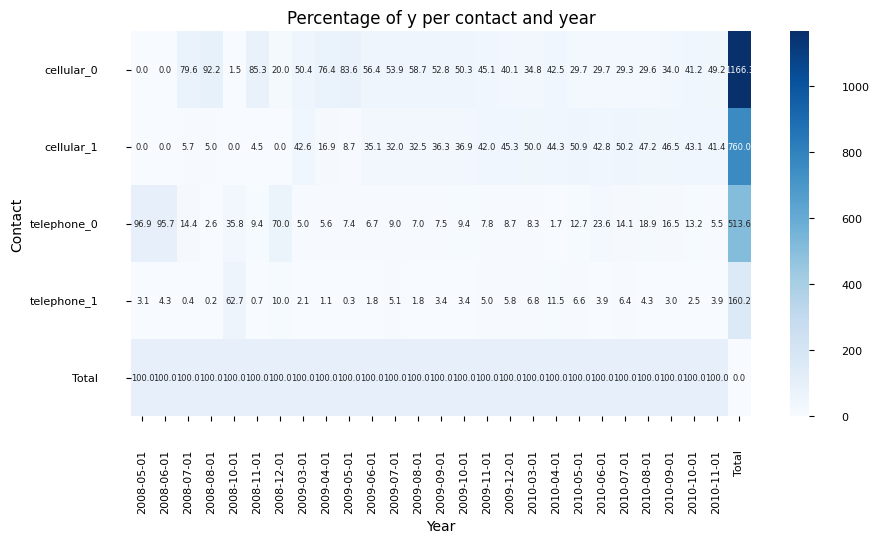

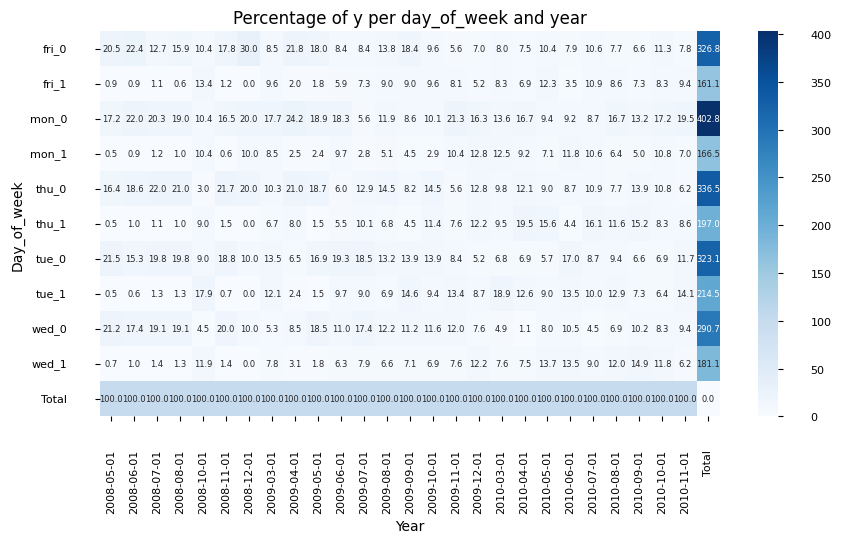

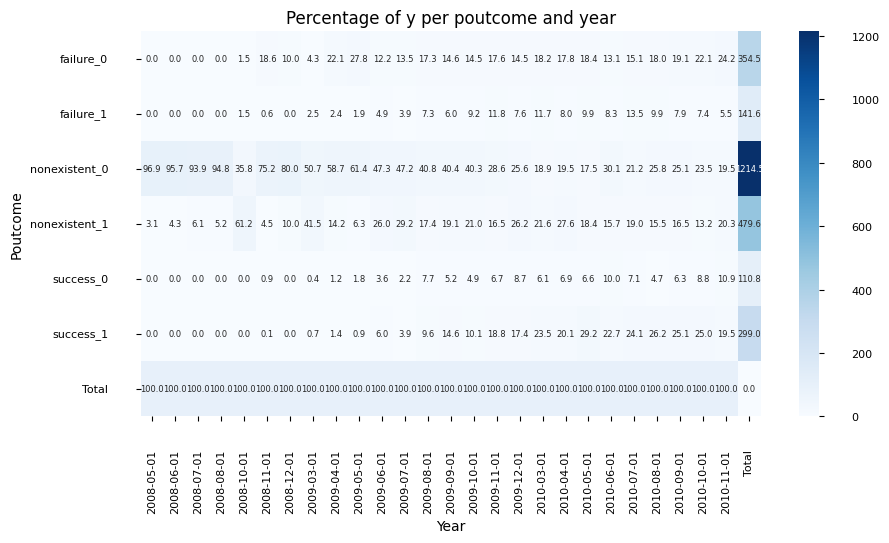

In [773]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

# Map month abbreviations to numbers
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

# Create 'date' feature
df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df = df.drop(["month", "month_num", "year"], axis=1)

# Map target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Get categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Create heatmaps for each categorical feature
for feature in categorical_features:
    if feature != 'date':
        df[feature + '_y'] = df.apply(lambda row: f"{row[feature]}_{row['y']}", axis=1)
        
        # Pivot the data
        pivot_table = df.pivot_table(index='date', columns=feature + '_y', values='y', aggfunc='count', fill_value=0).T
        
        # Calculate percentages per feature and date
        pivot_table_percent = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100
        
        # Calculate totals
        totals_year = pivot_table_percent.sum(axis=1)
        totals_feature = pivot_table_percent.sum(axis=0)
        
        # Add totals to percentage table
        pivot_table_percent.loc['Total'] = totals_feature
        pivot_table_percent['Total'] = totals_year
        
        # Replace NaN with 0 and infinity with 0
        pivot_table_percent = pivot_table_percent.fillna(0)
        pivot_table_percent = pivot_table_percent.replace([np.inf, -np.inf], 0)
        
        # Plot heatmap
        plt.rcParams['xtick.labelsize'] = 8
        plt.rcParams['ytick.labelsize'] = 8
        plt.figure(figsize=(10, 5))
        sns.heatmap(pivot_table_percent, annot=True, cmap='Blues', fmt='.1f', annot_kws={'fontsize': 6})
        
        plt.title(f'Percentage of y per {feature} and year')
        plt.xlabel('Year')
        plt.ylabel(feature.capitalize())
        plt.yticks(rotation=0)  
        plt.savefig(f'images/yper{feature}andyear.png')    
        plt.show()

# Distribution of the Data after being resampled

As we can see in the graph, the data looks a lot more even. 

Although there is still an imbalance in May 2008, I believe we can work with that.

C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\895911850.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


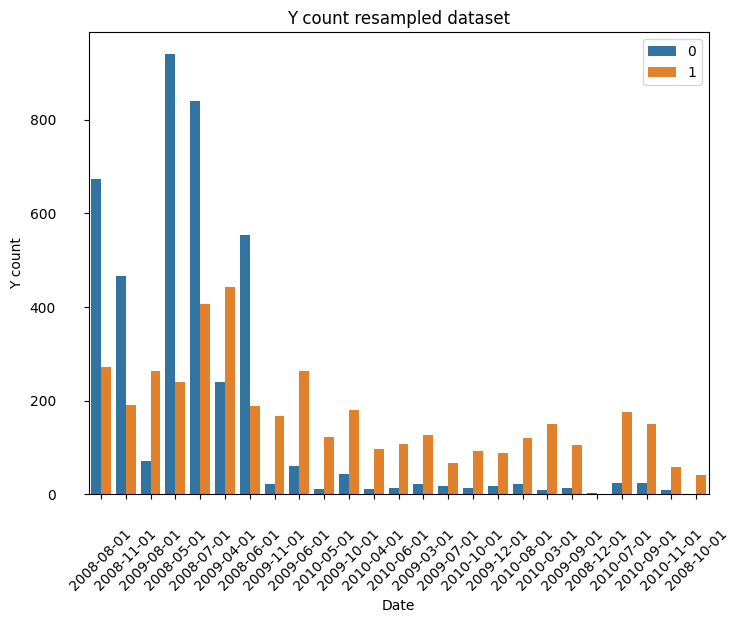

In [1125]:
import matplotlib.pyplot as plt
import seaborn as sns

X_resampled, y_resampled = cleandata(False, True,True)
#X, y_resampled = cleandata(False, True,True)
#X, y = cleandata(False,True,False)

resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='date', hue='y', data=resampled_df)
plt.xlabel('Date')
plt.ylabel('Y count')
plt.title('Y count resampled dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()
plt.savefig('images/ycountresampled.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Total distribution of the Outcome per month and per year

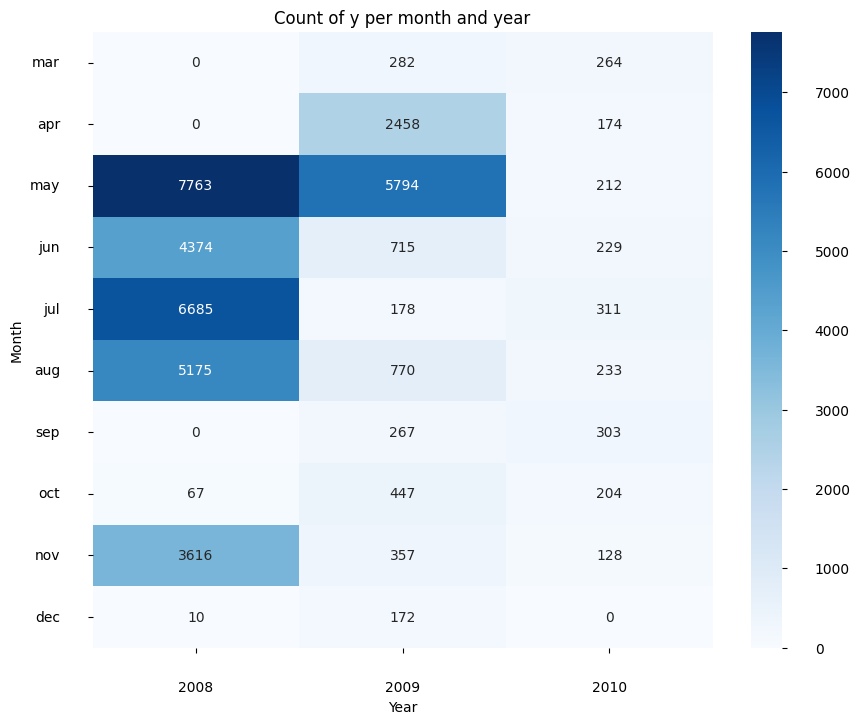

In [969]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

# Map month abbreviations to numbers
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

# Create 'date' feature
df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))


months_order = pd.Categorical(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                  ordered=True)

# Pivot data

order = months_order
pivot_df = pd.crosstab(df["month"], df['year']).reindex(labels=order)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='d')
plt.title('Count of y per month and year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)  # Hide month numbers, use month names instead
plt.savefig('images/totalypermonthandyear.png')    
plt.show()



# Total distribution of the Outcome == 1 per month and per year

In [84]:
def print_feature_year(df):
    months_order = pd.Categorical(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                      ordered=True)
    
    order = months_order
    
    # Pivot data
    pivot_df = pd.pivot_table(df, index="month", columns='year', values='y', aggfunc='count').reindex(labels=order)
    
    pivot_df = pivot_df.fillna(0)  # or pivot_df.dropna()
    
    # Ensure integer values
    pivot_df = pivot_df.astype(int)
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='d')
    plt.title('Count of y == "yes" per month and year')
    plt.xlabel('Year')
    plt.ylabel('Month')
    plt.yticks(rotation=0)  # Hide month numbers, use month names instead
    plt.savefig('images/ypermonthandyear.png')    
    plt.show()


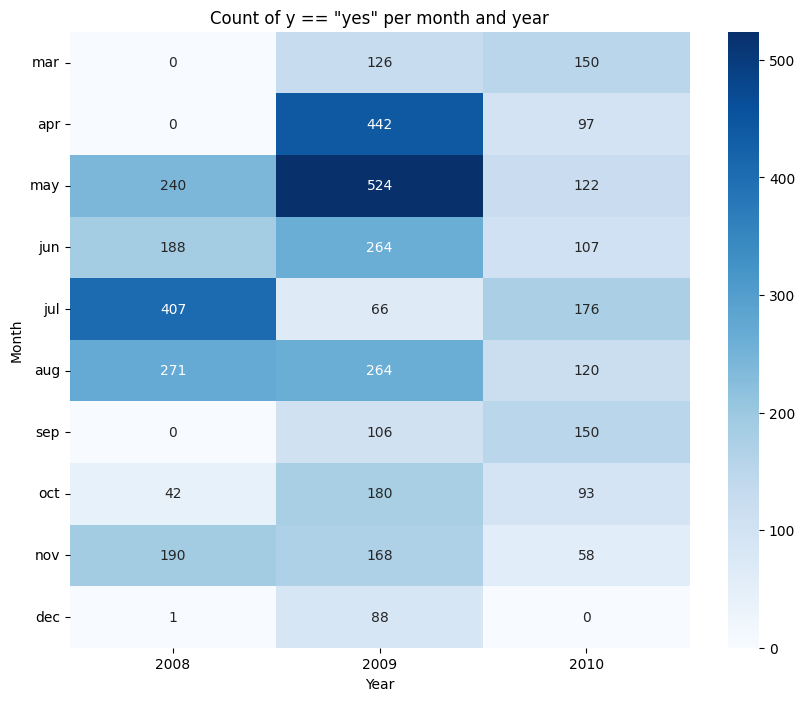

In [85]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')


df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

df = df.drop("duration",axis=1)

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Map month abbreviations to numbers
#df['month_num'] = df['month'].map(month_map)

# Create 'date' feature with day=1
#df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))
#df = df.drop({"month","year","month_num"},axis=1)


df['y'] = df['y'].map({'no': 0, 'yes': 1})
X = df.drop('y', axis=1)
y = df['y']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X,y)

resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

print_feature_year(df.query("y==1"))



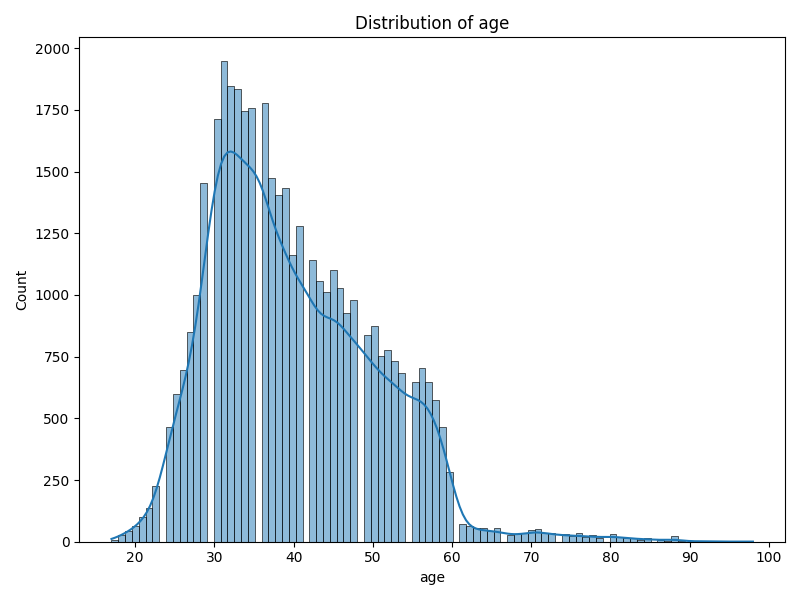
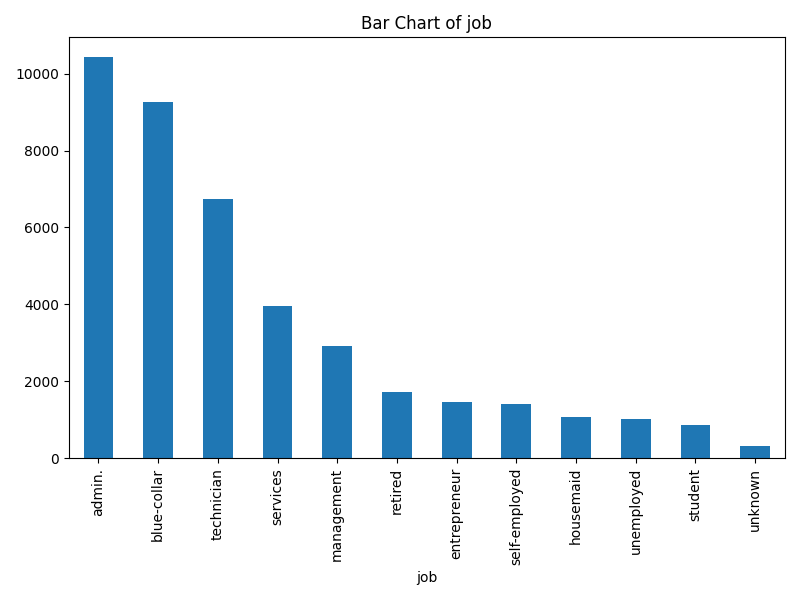
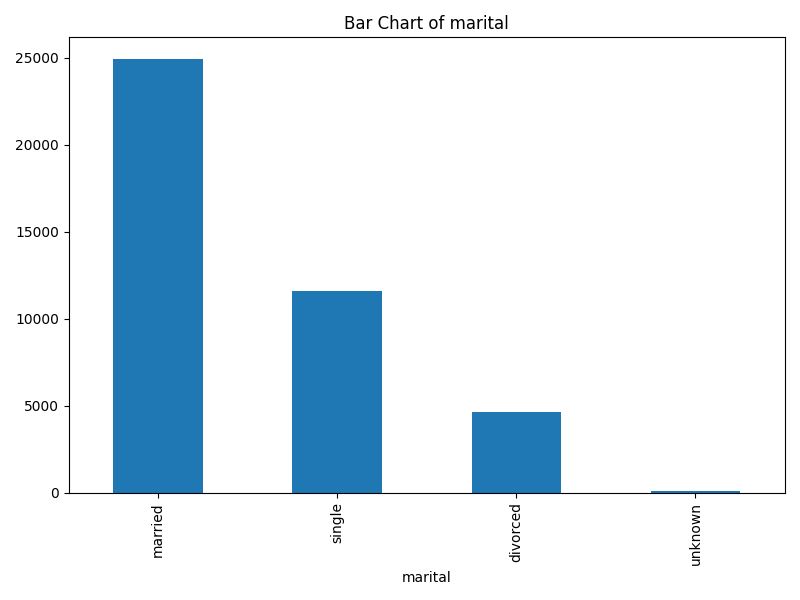
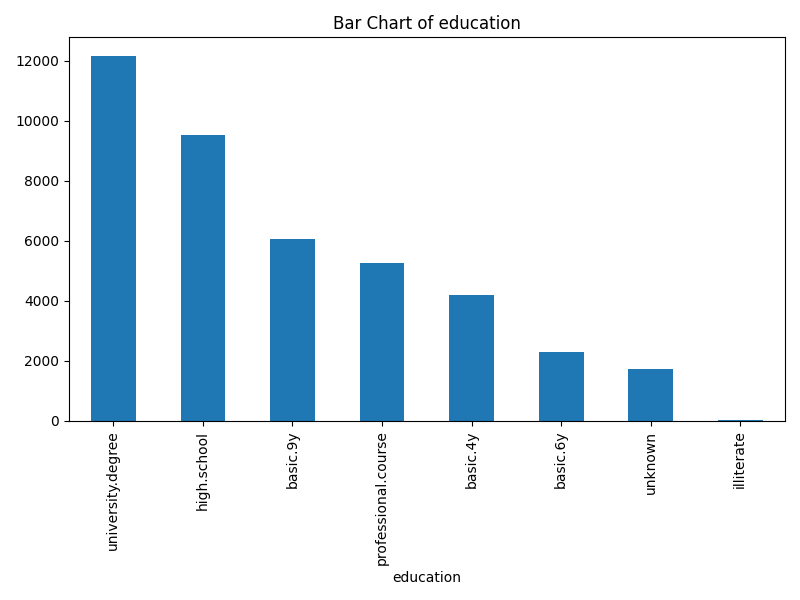
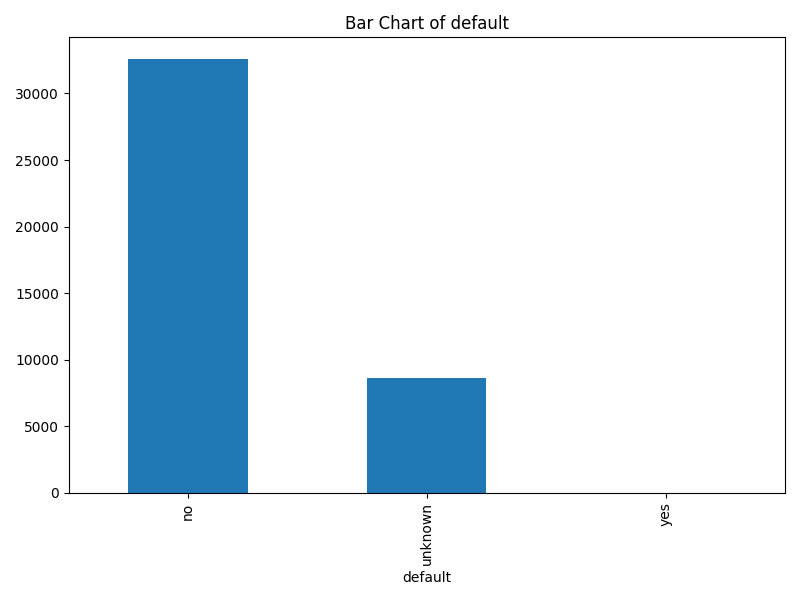
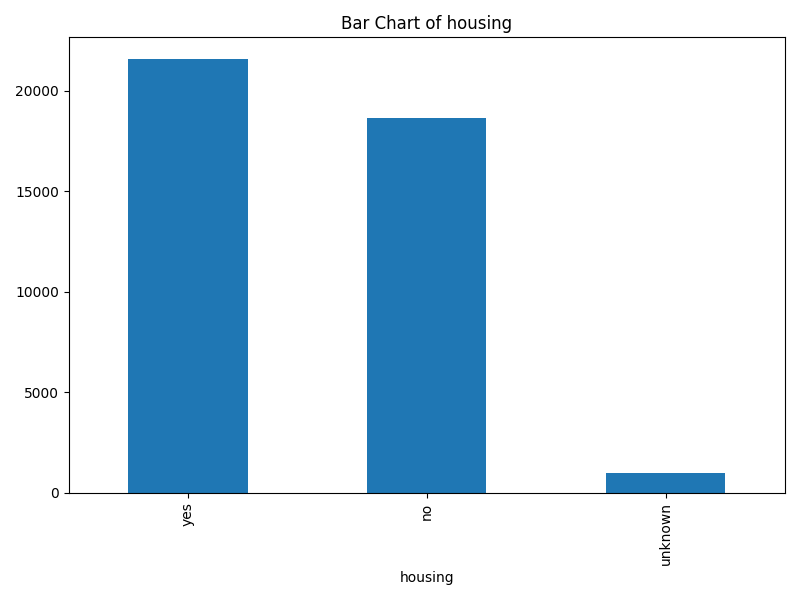
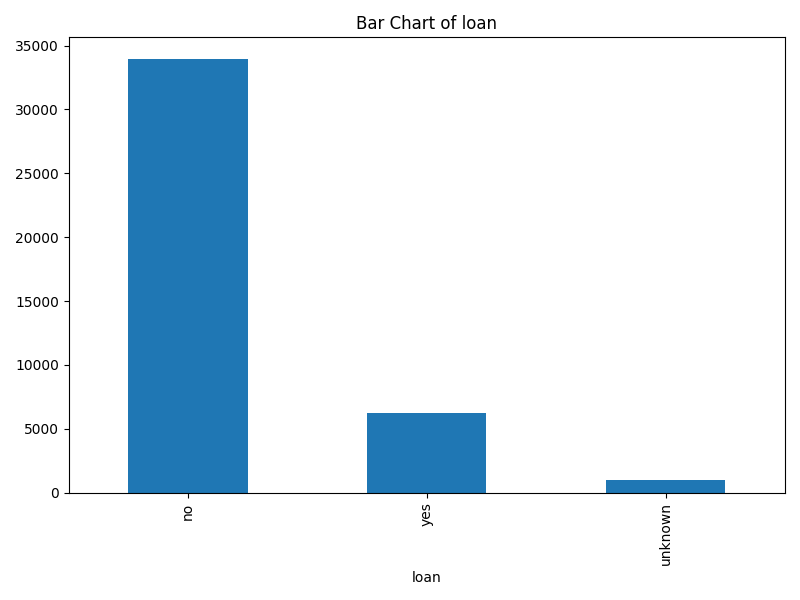
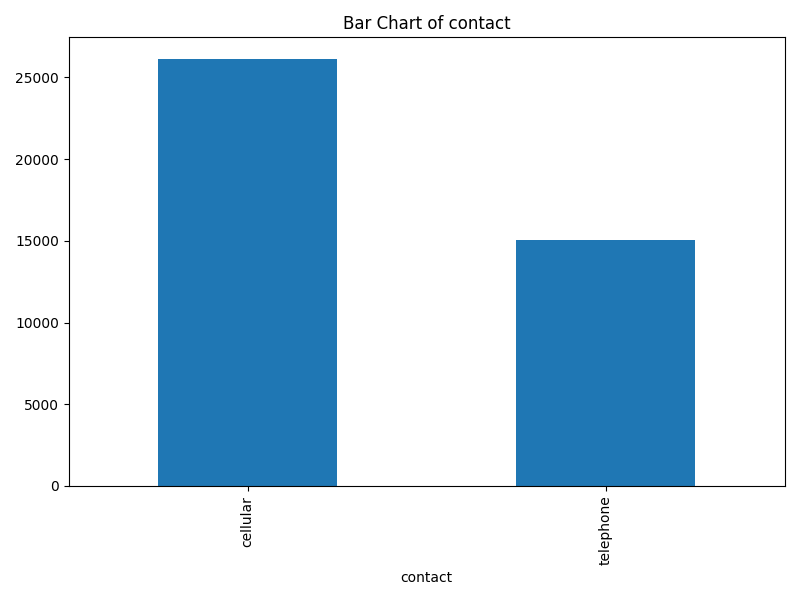
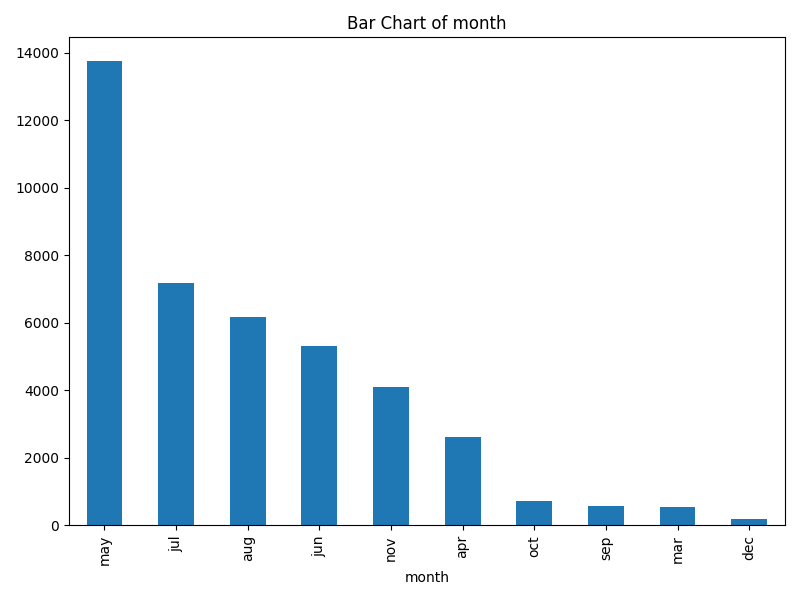
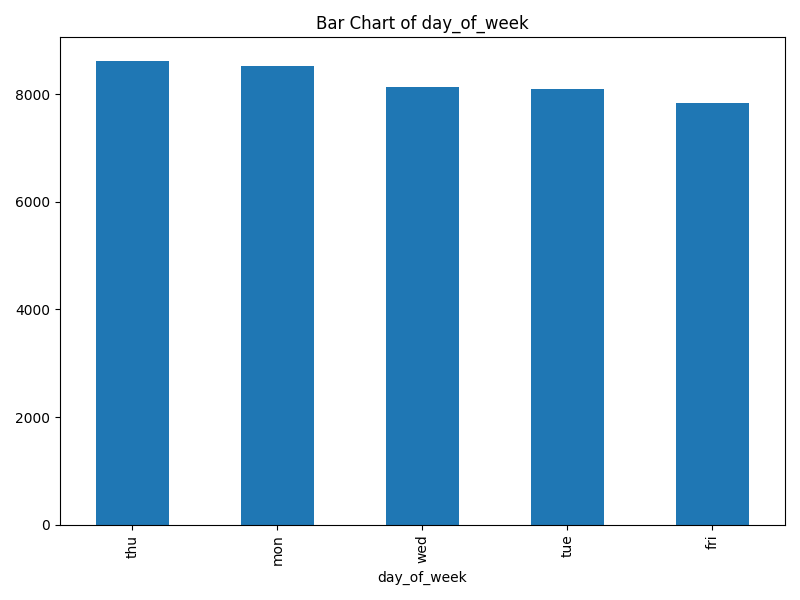
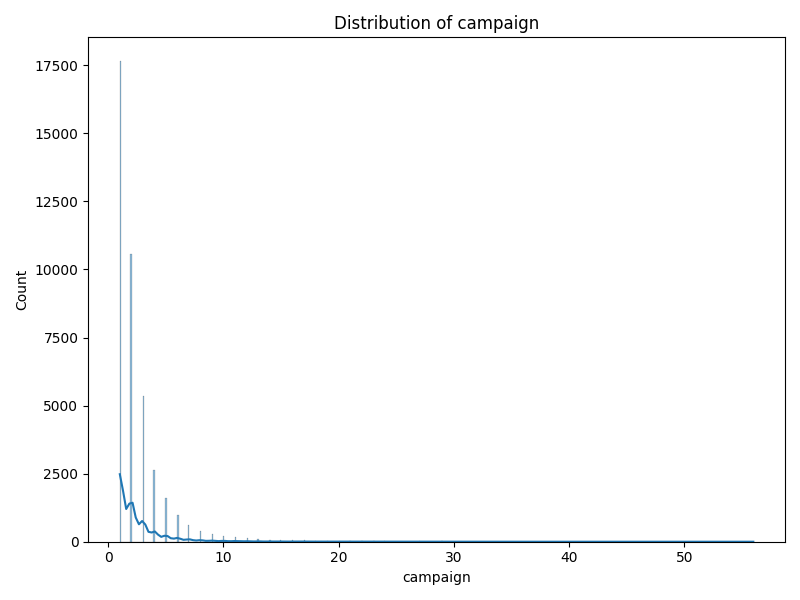
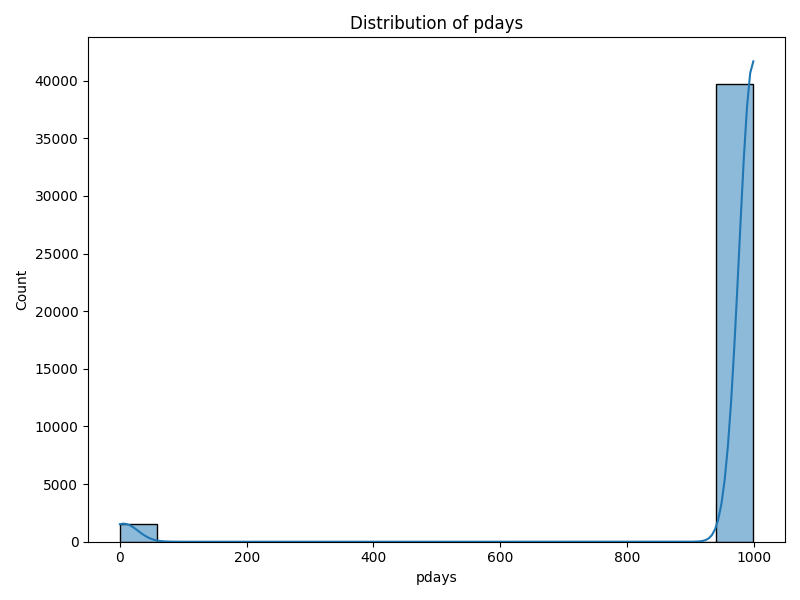
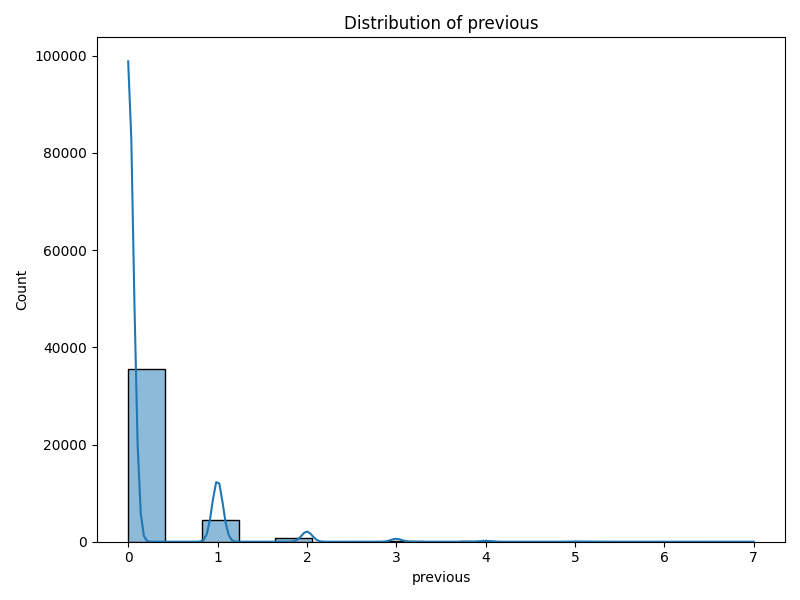
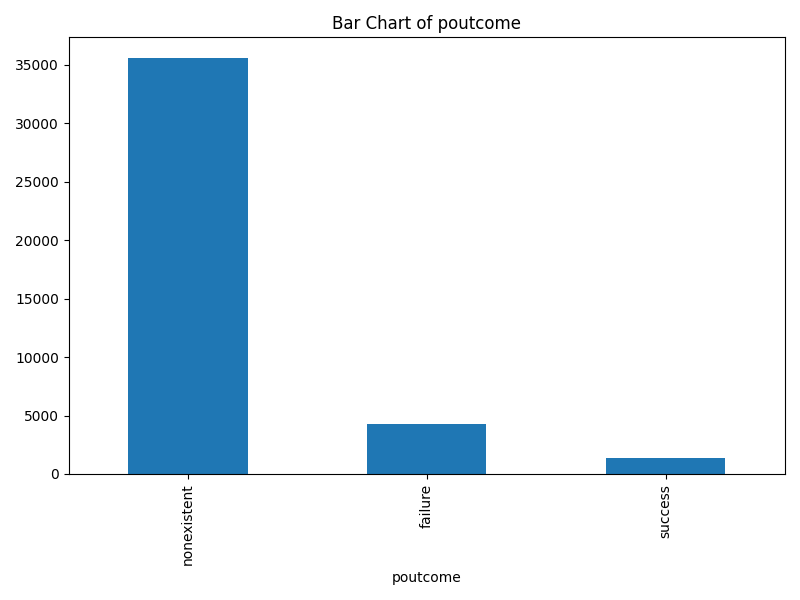
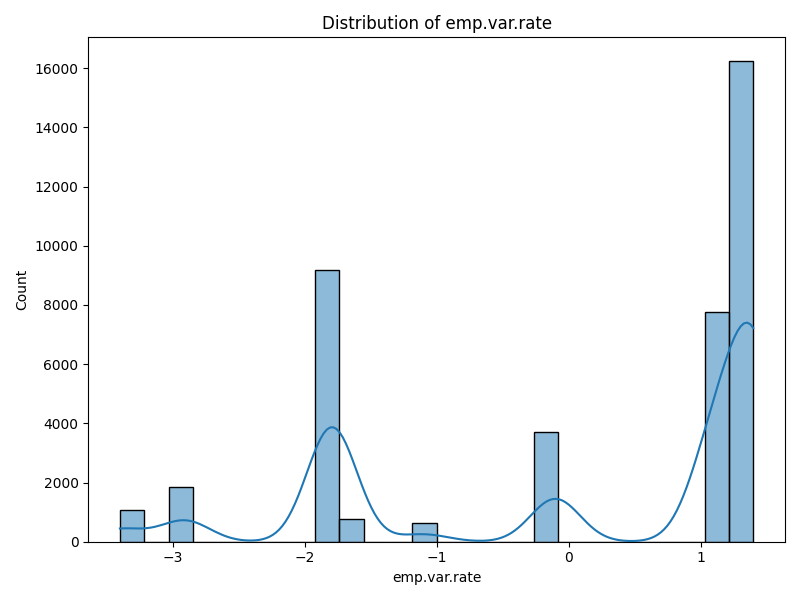
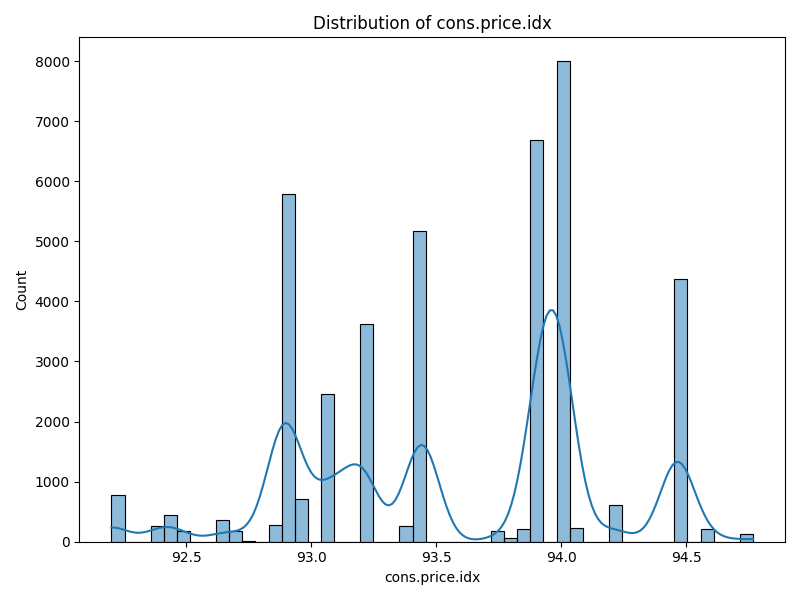
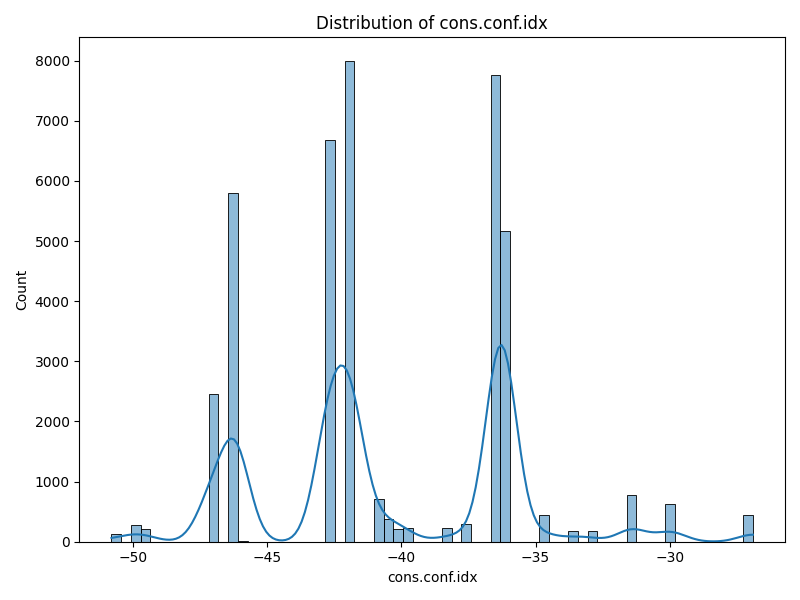
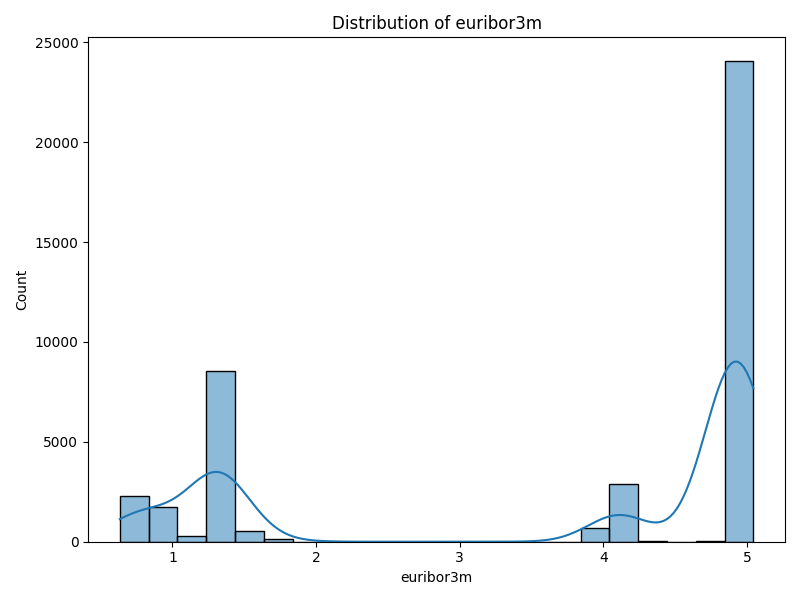
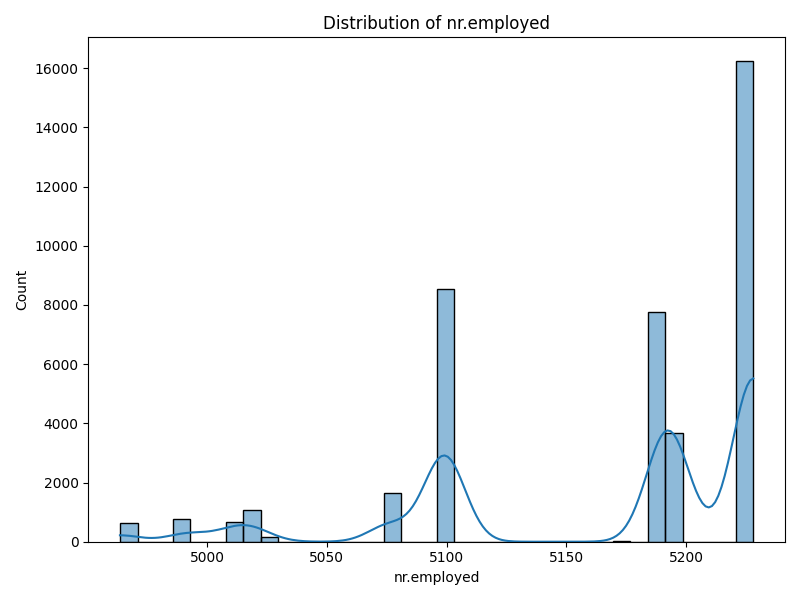
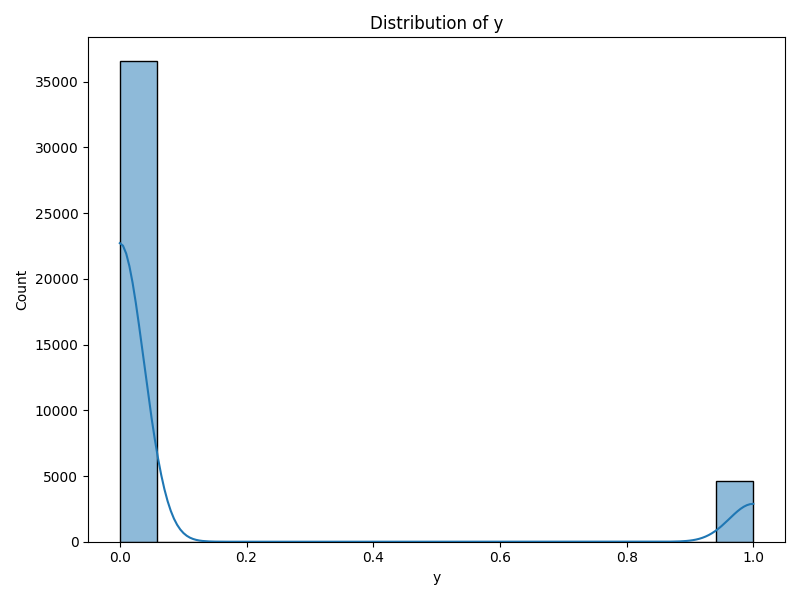
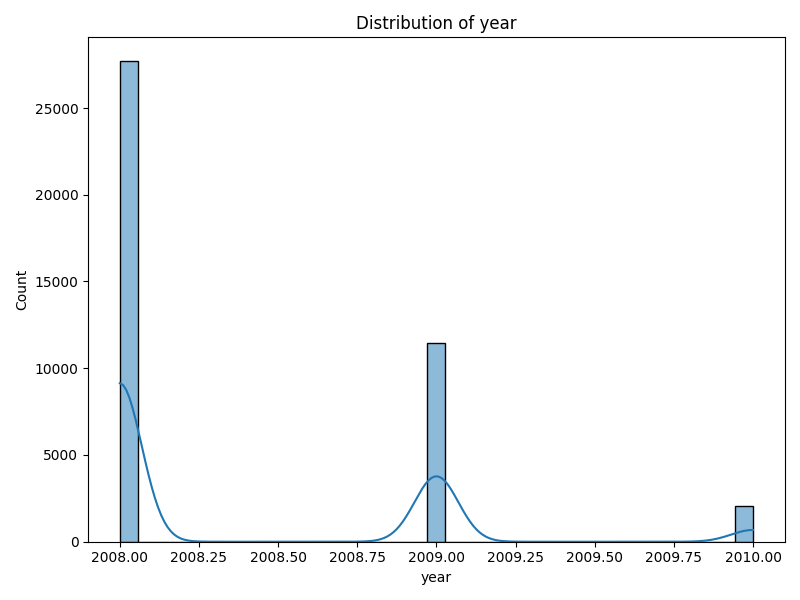

In [464]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from IPython.display import HTML

num_features = len(df.columns)

# Create plots for each feature
plots = []
for column in df.columns:
    if df[column].dtype.kind in 'bifc':  # numerical features
        fig = plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.tight_layout()
    else:  # categorical features
        fig = plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart of {column}')
        plt.tight_layout()
    buf = BytesIO()
    fig.savefig(buf, format='png', dpi=100)
    plots.append(f'data:image/png;base64,{base64.b64encode(buf.getvalue()).decode()}')
    plt.close()

# Create quality data tables for each feature
quality_tables = []
for column in df.columns:
    column_quality = pd.DataFrame({
        'Metric': ['Missing Values', 'Unique Values', 'Data Type', 'Total Values'],
        'Value': [df[column].isnull().sum(), df[column].nunique(), df[column].dtype, len(df[column])]
    })
    quality_tables.append(f"<b>{column}</b><br>{column_quality.to_html(index=False)}")

# Generate HTML table
html = f"""
<table>
    <tr>
        {''.join(f'<td><img src="{plot}" width="800"></td>' for plot in plots)}
    </tr>
    <tr>
        {''.join(f'<td>{table}</td>' for table in quality_tables)}
    </tr>
</table>
"""

HTML(html)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [215]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [130]:
df.y.value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

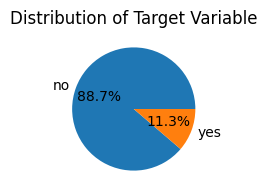

In [111]:
y = df.y.value_counts(normalize=True)
df_y = pd.DataFrame(y)
plt.figure(figsize=(3, 2))
plt.pie(df_y['proportion'], labels=df_y.index, autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.savefig('images/pie1.png')
plt.show()

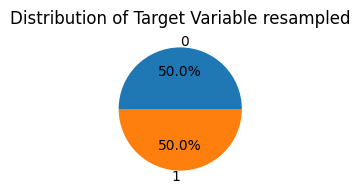

In [219]:
y2 = y_resampled.value_counts(normalize=True)
df_y2 = pd.DataFrame(y2)
plt.figure(figsize=(4, 2))
plt.pie(df_y2['proportion'], labels=df_y2.index, autopct='%1.1f%%')
plt.title('Distribution of Target Variable resampled')
plt.savefig('images/pie2.png')
plt.show()

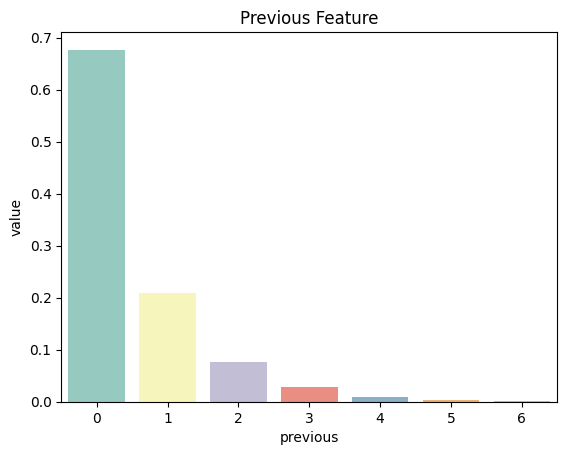

In [9]:
var = "previous"
#norm = df_features.query('y==1')[[f"{all_features[i]}"]].value_counts(normalize=True).to_frame('value')
norm = df.query('y==1')[[var]].value_counts(normalize=True).to_frame('value')
sns.barplot(legend=False, y='value', hue=var, x=var, data=norm, palette='Set3', errorbar=None)
plt.title('Previous Feature')
plt.savefig('images/previous.png')
plt.show()


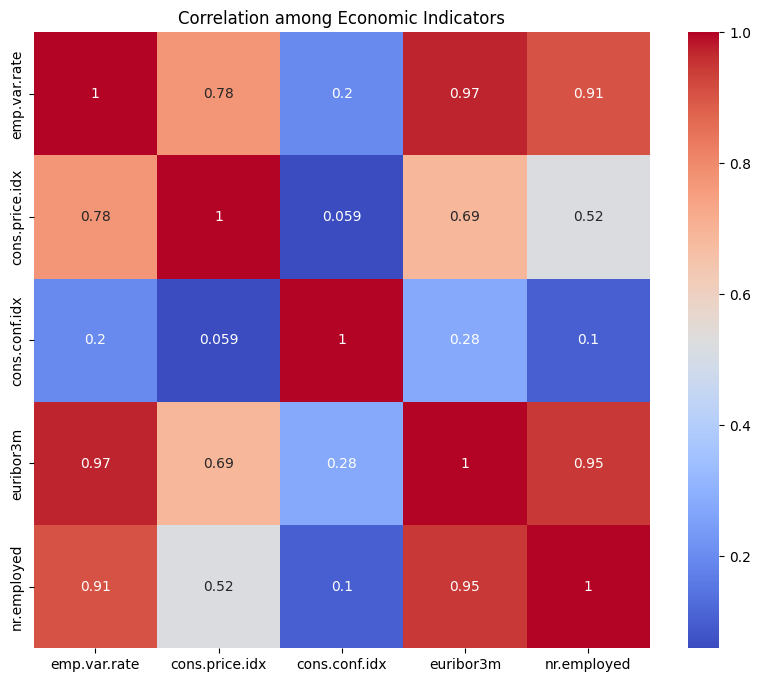

In [225]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

df = df.drop("duration",axis=1)

month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Map month abbreviations to numbers
df['month_num'] = df['month'].map(month_map)

# Create 'date' feature with day=1
df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))

economic_indicators = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# Calculate correlation matrix
corr_matrix = df[economic_indicators].corr()

#print(corr_matrix)
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation among Economic Indicators')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

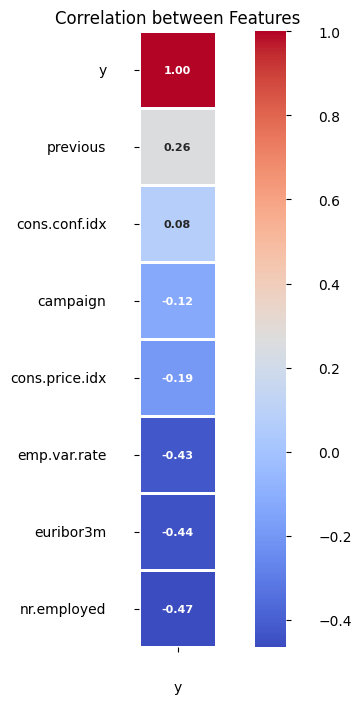

In [958]:
X_resampled, y_resampled = cleandata(False,False,False)
numeric_features = X_resampled.select_dtypes(include=['int32','int64', 'float64']).columns

df_features = pd.concat([X_resampled[numeric_features], y_resampled], axis=1)
df_features.y.value_counts()

corr_matrix = df_features.corr()
c =corr_matrix[['y']].sort_values(by='y', ascending=False) #.plot(kind = 'barh', fontsize = 8, color = 'red')
#print(c)
plt.figure(figsize=(10, 8))  # width, height
sns.heatmap(c, 
            cmap='coolwarm', annot=True, square=True, fmt='.2f', linewidth=2,
            annot_kws={'fontsize': 8, 'fontweight': 'bold'},
            cbar_kws={'shrink': 1})  # adjust colorbar width
# Increase annotation value width
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Specifically increase annotation width
plt.rcParams['ytick.major.pad'] = 20  # Increase this value
plt.rcParams['xtick.major.pad'] = 20  # Increase this value
plt.title('Correlation between Features')
plt.savefig('images/mod17_corr.png')
plt.show()


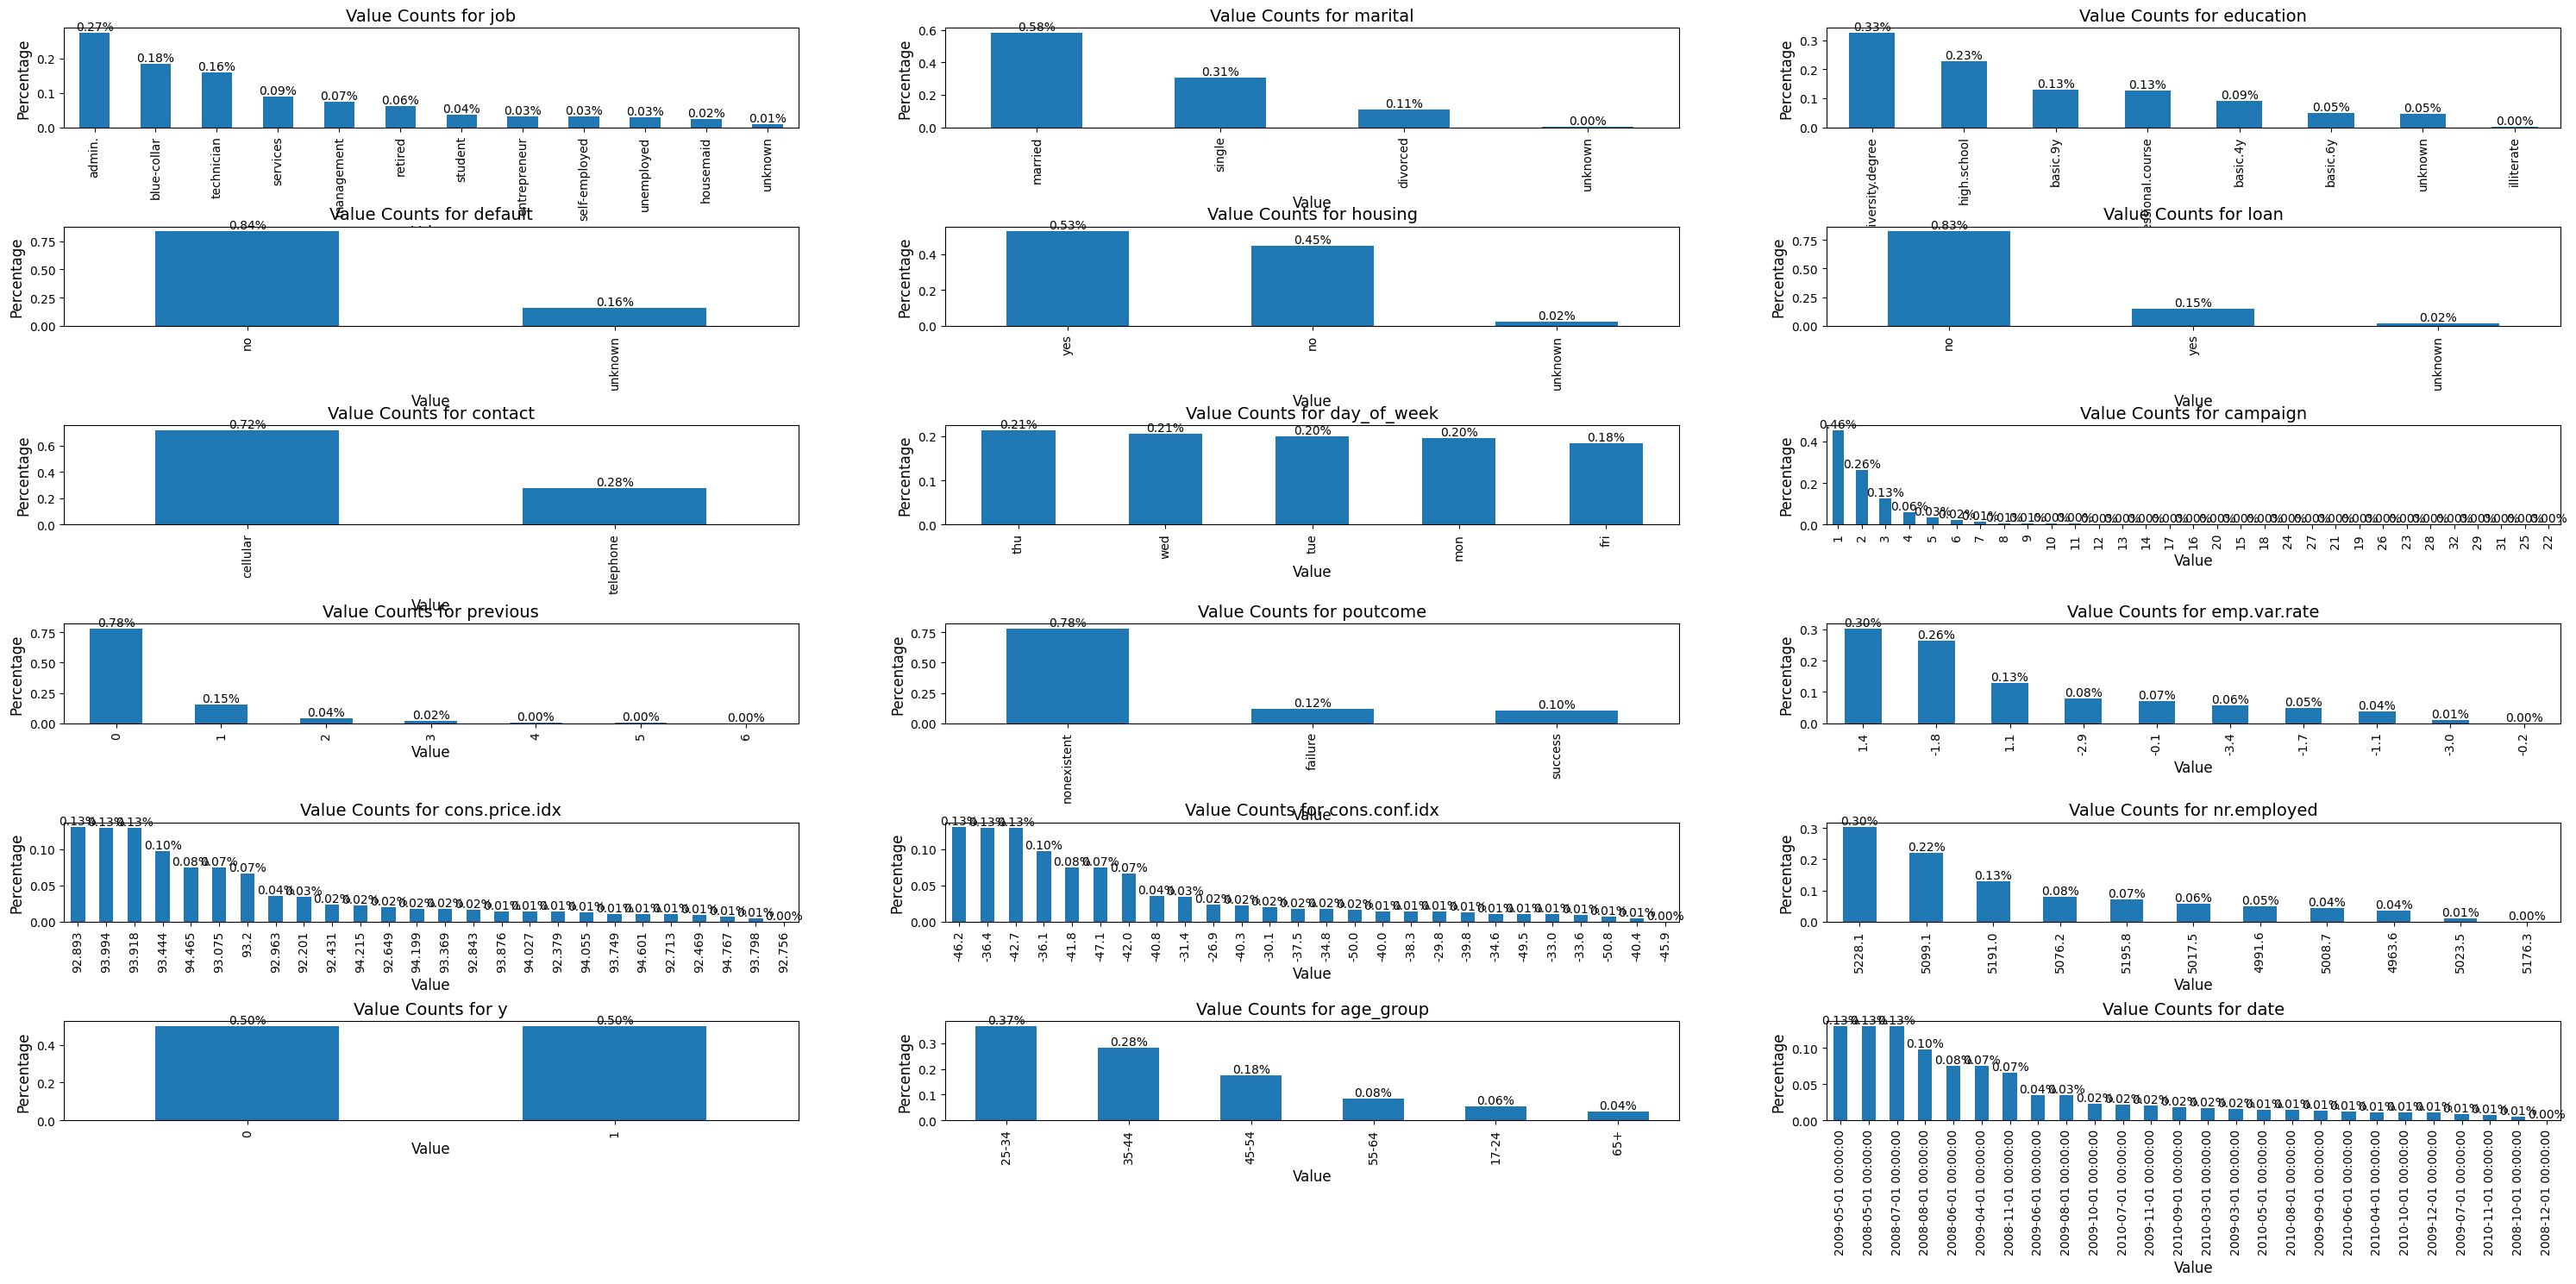

In [116]:
dropping = {"age","campaign","default","loan","poutcome","previous"}

df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

df = df.drop({"duration","pdays","euribor3m"},axis=1)

age_bins = [15, 25, 35, 45, 55, 65, 110]  # Added 65 as a separate bin edge
age_labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65+']  

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)
df = df.drop("age",axis=1)

df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                            np.array([2009] * (39130 - 27690)),
                            np.array([2010] * (41188 - 39130))))
    
month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    
    # Map month abbreviations to numbers
df['month_num'] = df['month'].map(month_map)
    
    # Create 'date' feature with day=1
df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1))
    
df = df.drop({"month_num","month","year"}, axis=1)


df['y'] = df['y'].map({'no': 0, 'yes': 1})
X = df.drop('y', axis=1)
y = df['y']

columns = df.select_dtypes(include=['int32','int64', 'float64','object',"category","datetime64"]).columns

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X,y)

resampled_data = pd.concat([X_resampled, pd.DataFrame(y_resampled, columns=['y'])], axis=1)

d2 = []
for column in columns:
    d = resampled_data[column].value_counts(normalize=True)
    d2.append({"name":column,"val":d})

#for i in d2:
#    print(i["val"])

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(30, 15))  # Increased figure size

for i, column in enumerate(columns):
    d = resampled_data[column].value_counts(normalize=True)
    d.plot(kind='bar', ax=axs[i // n_cols, i % n_cols])
    axs[i // n_cols, i % n_cols].set_title(f'Value Counts for {column}', fontsize=14)
    axs[i // n_cols, i % n_cols].set_xlabel('Value', fontsize=12)
    axs[i // n_cols, i % n_cols].set_ylabel('Percentage', fontsize=12)
    axs[i // n_cols, i % n_cols].tick_params(axis='x', rotation=90, labelsize=10)
    # Add numerical values to bars
    for p in axs[i // n_cols, i % n_cols].patches:
        axs[i // n_cols, i % n_cols].text(p.get_x() + p.get_width() / 2, 
                                          p.get_height(), 
                                          f'{p.get_height():.2f}%', 
                                          ha='center', 
                                          va='bottom', 
                                          fontsize=10)
plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.2)  # Adjusted subplot spacing
plt.savefig('images/valuec_balanced.png', dpi=300, bbox_inches='tight')
plt.show()

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder


# Calculate Information Value (IV)
def calculate_iv(feature, target):
    iv = 0
    for category in feature.unique():
        pos_outcomes = target[feature == category].sum()
        total_pos_outcomes = target.sum()
        category_percentage = (feature == category).mean()
        iv += (pos_outcomes / total_pos_outcomes) * np.log(pos_outcomes / total_pos_outcomes / category_percentage)
    return iv

X, y = cleandata(True)

# Calculate Mutual Information
mutual_info = mutual_info_classif(X, y)


# Permutation Importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
perm_importance = rf.feature_importances_

mutual_info_dict = dict(zip(X.columns, mutual_info))
perm_importance_dict = dict(zip(X.columns, perm_importance))

features_to_keep = []
features_to_drop = []
for feature in X.columns:
    iv = calculate_iv(X[feature], y)
    if iv > 0.02 or mutual_info_dict[feature] > 0.1 or perm_importance_dict[feature] > 0.01:
        features_to_keep.append(feature)        
    else:
        features_to_drop.append(feature)        

features_to_drop


In dummy True


C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\1467857999.py:14: RuntimeWarning: divide by zero encountered in log
  iv += (pos_outcomes / total_pos_outcomes) * np.log(pos_outcomes / total_pos_outcomes / category_percentage)
C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\1467857999.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  iv += (pos_outcomes / total_pos_outcomes) * np.log(pos_outcomes / total_pos_outcomes / category_percentage)


[]

In [136]:
from IPython.display import display, HTML

# Print the confusion matrix

def print_cm(df_results):
    df_cm = df_results.copy()
    df_cm = df_cm[["name","Confusion matrix"]]
    
    
    # Create HTML table
    html_table = """
    <table border="1">
        <tbody>
    """
    
    for index, row in df_cm.iterrows():
        if (index % 2  == 0):
            html_table += f"""
                <tr>
                    <td>{row['name']}</br>
                    {row["Confusion matrix"][0]}</br>
                    {row["Confusion matrix"][1]}
                    </td>
            """
        else:
            html_table += f"""
                    <td>{row['name']}</br>
                    {row["Confusion matrix"][0]}</br>
                    {row["Confusion matrix"][1]}
                    </td>
                </tr>
            """
            
    
    html_table += """
        </tbody>
    </table>
    """
    
    return display(HTML(html_table))


In [221]:
# train the model for the full features

def train_model(name, config, X_train, y_train):
    try:
        start_time = time.time()
        if config["selector"] == "":
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, config['model'])])
        else:
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), ("selector",config["selector"]), (name, config['model'])])
        grid_search = GridSearchCV(pipeline, param_grid=config['params'], cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
    
        # Print best parameters and score
    
        # Get best estimator
        best_estimator = grid_search.best_estimator_
    
        # Get selected features
        if config["selector"] == "":
    #        best_features = best_estimator.named_steps['selector'].support_
            if hasattr(best_estimator.named_steps[name], 'feature_importances_'):
                selected_feature_names = best_estimator.named_steps[name].feature_importances_
            else:
                selected_feature_names = ""
        else:
            best_features = best_estimator.named_steps['selector'].support_
            # Get feature names after preprocessing
            preprocessed_features = best_estimator.named_steps['preprocessor'].get_feature_names_out()
            
            # Get selected feature names
            selected_feature_names = [feature for feature, selected in zip(preprocessed_features, best_features) if selected]
        
            # Get feature ranking
            feature_ranking = best_estimator.named_steps['selector'].ranking_
        
    
        
        y_pred = grid_search.predict(X_test)
        score = grid_search.score(X_test,y_test) #from office hour
        train_accuracy = grid_search.best_score_
        accuracy = accuracy_score(y_test, y_pred)
    #    print("accuracy:%s" % str(round(pipe.score(X_test,y_test))))
        cr = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print("cr",cr)
        results ={
            "name":name,
            'accuracy': accuracy,
            "train_accuracy":train_accuracy,
            "score":score,
            'best_params': grid_search.best_params_,
            'grid_search': grid_search,
            "Confusion matrix": cm,
            'Precision Class 0': cr['0']['precision'],
            'Recall Class 0': cr['0']['recall'],
            'F1-score Class 0': cr['0']['f1-score'],
            'Precision Class 1': cr['1']['precision'],
            'Recall Class 1': cr['1']['recall'],
            'F1-score Class 1': cr['1']['f1-score'],
            'Accuracy': cr['accuracy'],
            "elapsed" : elapsed_time,
            "Selected Features": selected_feature_names,
        }
        return results
    except Exception as e:
        logging.error(f"Error: {e}")
        return None


In [1068]:

# Clean the data, dropping features, grouping and transforming data

def cleandata(dummy, formatdate, merge_cats):
    df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

    age_bins = [15, 25, 35, 45, 55, 110]  # Added 65 as a separate bin edge
    age_labels = ['17-24', '25-34', '35-44', '45-54', '55-110']  
    
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
    df = df.drop("age",axis=1)
    
    bins = [0, 1, 3, 6, 12, np.inf]
    labels = ["very_low",'low', 'medium', 'high', 'very_high']
    
#    df = df.drop({"duration","euribor3m","pdays"},axis=1)
    df = df.drop({"duration","pdays"},axis=1)
    
    
    merged_categories = {
        'job': {
            'other': ["retired","student",'entrepreneur', 'housemaid', 'self-employed', 'unemployed', 'unknown']
        },
        'marital': {
            'divorced': ['unknown']
        },
        'education': {
            'other': ['basic.6y', 'illiterate', 'unknown']
        },
        'default': {
            'unknown': ['yes']
        },
        'housing': {
            'no': ['unknown']
        },
        'loan': {
            'yes': ['unknown']
        }
    }

# Apply merged categories
    if (merge_cats):
        for feature, categories in merged_categories.items():
            for new_category, old_categories in categories.items():
                df[feature] = df[feature].replace(old_categories, new_category)
####
    if (formatdate):
        df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                            np.array([2009] * (39130 - 27690)),
                            np.array([2010] * (41188 - 39130))))
    
        month_map = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
            'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
            'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }

    # Map month abbreviations to numbers
        df['month_num'] = df['month'].map(month_map)
    
    # Create 'date' feature with day=1
        df['date'] = pd.to_datetime(df.apply(lambda row: f"{row['year']}-{row['month_num']}-01", axis=1)).dt.strftime('%Y-%m-%d').astype('object')
    
        df = df.drop({"month_num","month","year"}, axis=1)

        df = df.query("date != '2009-05-01'")
    
#############################    
    
    df['y'] = df['y'].map({'no': 0, 'yes': 1})

    if (dummy):
        print("In dummy",dummy)
        X_dummy = pd.get_dummies(df.select_dtypes(include=['object',"category"]), drop_first=True).astype(int)
        df = df.drop(df.select_dtypes(include=['object',"category"]),axis=1)
        df = pd.concat([df, pd.DataFrame(X_dummy)], axis=1)
    
    X = df.drop('y', axis=1)
    y = df['y']

#    rus = RandomUnderSampler(random_state=42, sampling_strategy='all')
    rus = RandomUnderSampler(random_state=42)
    
    X_resampled, y_resampled = rus.fit_resample(X,y) 
    
    return X_resampled, y_resampled

In [1115]:
def dropdate(X):
    month_map = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    
    # Separate date columns from non-date columns
    date_cols = [col for col in X.columns if 'date_' in col]
    # Extract month from date columns
    X_date = X[date_cols].copy()
    X_date.columns = [col.replace('date_', '') for col in X_date.columns]
    
    # Convert column names to month abbreviations and numbers
    months = [pd.to_datetime(col).strftime('%b').lower() for col in X_date.columns]
    month_nums = [month_map[month] for month in months]
    
    # Create new DataFrame with summed month values
    new_X = pd.DataFrame()
    for month, month_abbr in month_map.items():
        new_X[f'{month.capitalize()}'] = X_date.loc[:, [m == month_map[month] for m in month_nums]].sum(axis=1)
    
    # Drop original date features and add new month features
    X = X.drop(date_cols, axis=1)
    X = X.drop("date",axis=1)
    X = pd.concat([X, new_X], axis=1)
    return X

<h1>Data Preprocessing Approach</h1>
<p>Upon discovering that the dataset spanned from <strong>May 2008 to November 2010</strong>, I initially considered incorporating the date as a feature. However, I soon realised that this would introduce a variable that would never recur, potentially dominating the model and leading to overfitting.</p>
	
<p>Removing the date resulted in subpar performance, characterised by low scores and poor precision for both classes 0 and 1, with an alarmingly high false negative rate.</p>
	
<p>An alternative approach involved splitting the data at a point where the classes were more balanced, but this too led to overfitting.</p>
	
<p>Undeterred, I explored another strategy that ultimately yielded improved results.</p>
	
<p>Specifically, I utilised a previously employed method to calculate the date, then discarded the month and year components.</p>
	
<p>Subsequently, I applied RandomUnderSampler to ensure the date was incorporated into the resampling process, thereby maintaining proportional sampling by month and year.</p>
	
<p>Following resampling, I extracted the month from the previously generated date, effectively reverting to the original monthly format, and removed the date from the dataset.</p>
	
<p>Although the process may seem complex, the outcomes suggest it has been effective, with notable improvements in test set scores and class precision.</p>


In [1116]:
X, y_resampled = cleandata(False, True,True)
#X_dummy = pd.get_dummies(X["date"], drop_first=True).astype(int)
encoder = OneHotEncoder()
encoded = encoder.fit_transform(X[['date']])
encoded_cols = encoder.get_feature_names_out()
encoded_dense = encoded.toarray()
dense = pd.DataFrame(encoded_dense, columns=encoded_cols)
dense.index = X.index
X = pd.concat([X,dense],axis=1)
X_resampled = dropdate(X)
X_resampled


C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\895911850.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


,job,marital,education,default,housing,loan,contact,day_of_week,campaign,previous,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
20759,technician,married,professional.course,no,yes,yes,cellular,wed,5,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23372,technician,divorced,high.school,no,yes,no,cellular,wed,3,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26449,management,married,university.degree,no,no,no,telephone,thu,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37134,other,single,high.school,no,no,no,cellular,tue,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22601,admin.,married,other,unknown,no,no,cellular,fri,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,other,married,university.degree,no,yes,no,cellular,thu,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41178,other,married,university.degree,no,no,no,cellular,thu,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41181,admin.,married,university.degree,no,yes,no,cellular,fri,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41183,other,married,professional.course,no,yes,no,cellular,fri,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# The model with full features

In [1117]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from joblib import Parallel, delayed
from sklearn.preprocessing import OrdinalEncoder

import time


#X_resampled, y_resampled = cleandata(False, False,True)
X_resampled, y_resampled = cleandata(False, True,True)
X_resampled = dropdate(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define preprocessing steps
numeric_features = X_train.select_dtypes(include=['int32','int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object',"category","datetime64[ns]"]).columns

#numeric_features = ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
#       'cons.conf.idx', 'euribor3m', 'nr.employed']

#categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact',
#       'month', 'day_of_week', 'poutcome', 'age_group', "education"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
#        ('ord',OrdinalEncoder(),['education']),
        ('cat', OneHotEncoder(), categorical_features),
    ]
#    ,remainder='passthrough'
)

# Define models and hyperparameter grids

models = {
    'lgr': {
        'model': LogisticRegression(max_iter=1000),
        "selector":"",
        'params': {
            'lgr__C': [0.01, 0.1, 1],
            'lgr__penalty': ['l2']
        }
    },
    'dt': {
        'model': DecisionTreeClassifier(),
        "selector":"",
        'params': {
            'dt__max_depth': range(1, 11),
            'dt__min_samples_split': range(2, 11),
            'dt__criterion': ['gini', 'entropy'],
            'dt__min_samples_leaf': [1, 5, 10]            
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        "selector":"",
        'params': {
            'KNN__n_neighbors': range(1, 21),
            'KNN__weights': ['uniform', 'distance']
        }
    },
    'SVM': {
        'model': SVC(),
        "selector":"",
        'params': {
            'SVM__kernel': ['linear', 'rbf'],
            'SVM__gamma': [0.1, 1.0, 10.0, 100.0],
        }
    }
}

# Perform grid search and evaluate models
results = []
# GridSearchCV for hyperparameter tuning
#for name, config in models_.items():

results = Parallel(n_jobs=-1)(delayed(train_model)(name, config, X_train, y_train) for name, config in models.items())

# Create DataFrame
df_results = pd.DataFrame(results)
grid_search = df_results["grid_search"]
df_results = df_results.drop({'grid_search',"Selected Features"}, axis=1)

# Transpose DataFrame before styling
#print(df_results)

df_transposed = df_results.set_index('name').T
# Separate numeric columns
numeric_cols = df_transposed.select_dtypes(exclude=['object']).columns  # Exclude object type (dicts)

# Highlight highest score for each category
def highlight_max(val):
    if isinstance(val, (int, float)):  
        max_val = df_transposed.max(axis=1)[val.index]  # Get max value for current row
        if val == max_val:
            return f'background-color: green; color: white'
    return ''

# Apply highlighting to numeric columns only
#styled_df = df_transposed.style.applymap(highlight_max, subset=numeric_cols)
styled_df = df_transposed.style.map(highlight_max, subset=numeric_cols)

# Create HTML table
html_table = styled_df.to_html()
styled_df.to_html('models_table.html')


# Display HTML table
from IPython.display import display, HTML
display(HTML(html_table))


C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\895911850.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


name,lgr,dt,KNN,SVM
accuracy,0.758704,0.761943,0.760729,0.762348
train_accuracy,0.760155,0.767964,0.761717,0.766056
score,0.758704,0.761943,0.760729,0.762348
best_params,"{'lgr__C': 1, 'lgr__penalty': 'l2'}","{'dt__criterion': 'entropy', 'dt__max_depth': 7, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 8}","{'KNN__n_neighbors': 20, 'KNN__weights': 'uniform'}","{'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}"
Confusion matrix,[[1051 207] [ 389 823]],[[1061 197] [ 391 821]],[[1056 202] [ 389 823]],[[1068 190] [ 397 815]]
Precision Class 0,0.729861,0.730716,0.730796,0.729010
Recall Class 0,0.835453,0.843402,0.839428,0.848967
F1-score Class 0,0.779096,0.783026,0.781354,0.784429
Precision Class 1,0.799029,0.806483,0.802927,0.810945
Recall Class 1,0.679043,0.677393,0.679043,0.672442


In [1120]:
#selected_feature_names = best_estimator.named_steps[name].feature_importances_

coefficients = grid_search[0].best_estimator_.named_steps["lgr"].coef_[0]

feature_names = grid_search[0].best_estimator_.named_steps["preprocessor"].get_feature_names_out()
feature_importances = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importances = feature_importances.sort_values('Coefficient', ascending=False)

feature_importances


,Feature,Coefficient
49,cat__poutcome_success,0.970536
3,num__cons.price.idx,0.343064
40,cat__contact_cellular,0.280276
54,cat__age_group_55-110,0.198071
50,cat__age_group_17-24,0.194161
31,cat__education_other,0.171961
1,num__previous,0.148985
33,cat__education_university.degree,0.145373
27,cat__marital_single,0.098282
46,cat__day_of_week_wed,0.093659


In [1127]:
print_cm(df_results)

lgr [1051 207] [388 824],dt [1065 193] [390 822]
KNN [1058 200] [403 809],SVM [1075 183] [407 805]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [968]:
# The model with GridSearchCV

import logging
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

def train_model2(name: str, config: dict, X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series) -> dict:
    """
    Trains a machine learning model using GridSearchCV.

    Parameters:
    name (str): Model name.
    config (dict): Model configuration.
    X_train (pd.DataFrame): Training features.
    y_train (pd.Series): Training target.
    X_test (pd.DataFrame): Testing features.
    y_test (pd.Series): Testing target.

    Returns:
    dict: Training results.
    """
    start_time = time.time()
#    logging.basicConfig(level=logging.INFO)
    logging.basicConfig(filename='errors.log', level=logging.ERROR)
    logging.info("Training model...")

    try:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(), categorical_features)
            ]
        )
        
        if config["selector"] == "":
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, config['model'])])
        else:
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), ("selector",config["selector"]), (name, config['model'])])
        
        grid_search = GridSearchCV(pipeline, param_grid=config['params'], cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)

        # Get best estimator
        best_estimator = grid_search.best_estimator_

        # Get selected features
        if config["selector"] == "":
            if hasattr(best_estimator.named_steps[name], 'feature_importances_'):
                selected_feature_names = best_estimator.named_steps[name].feature_importances_
            else:
                selected_feature_names = ""
        else:
            best_features = best_estimator.named_steps['selector'].support_
            preprocessed_features = best_estimator.named_steps['preprocessor'].get_feature_names_out()
            selected_feature_names = [feature for feature, selected in zip(preprocessed_features, best_features) if selected]
            feature_ranking = best_estimator.named_steps['selector'].ranking_

        y_pred = grid_search.predict(X_test)
        y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
        
        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        train_accuracy = grid_search.best_score_
        score = grid_search.score(X_test, y_test)
        cr = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)

        end_time = time.time()
        elapsed_time = end_time - start_time
        
        results = {
            "name": name,
            "accuracy": accuracy,
            "train_accuracy": train_accuracy,
            "score": score,
            'best_params': grid_search.best_params_,
            'grid_search': grid_search,
            "Confusion matrix": cm,
            'Precision Class 0': cr['0']['precision'],
            'Recall Class 0': cr['0']['recall'],
            'F1-score Class 0': cr['0']['f1-score'],
            'Precision Class 1': cr['1']['precision'],
            'Recall Class 1': cr['1']['recall'],
            'F1-score Class 1': cr['1']['f1-score'],
            'Accuracy': cr['accuracy'],
            "elapsed": elapsed_time,
            "Selected Features": selected_feature_names,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "ROC Curve": (fpr, tpr),
            "PR Curve": (precision, recall)
        }
        
        return results
    
    except Exception as e:
        logging.error(f"Error: {e}")
        return None

# The model with GridSearchCV

In [1122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from joblib import Parallel, delayed
import time


#X_resampled, y_resampled = cleandata(False, False,True)
X_resampled, y_resampled = cleandata(False, True,True)
X_resampled = dropdate(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define preprocessing steps
numeric_features = X_resampled.select_dtypes(include=['int32','int64', 'float64']).columns
categorical_features = X_resampled.select_dtypes(include=['object',"category"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

#numeric_features = ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
#       'cons.conf.idx', 'euribor3m', 'nr.employed']

#categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact',
#       'month', 'day_of_week', 'poutcome', 'age_group','education']


features_to_select = 15

models = {
    'lgr': {
        'model': LogisticRegression(max_iter=1000),
        "selector": RFE(Lasso(), n_features_to_select=features_to_select),
        'params': {
            'selector__estimator__alpha': [0.01, 0.1, 1],
            'lgr__C': [0.01, 0.1, 1],
            'lgr__penalty': ['l2']
        }
    },
    "dt": {
        "model": DecisionTreeClassifier(),
        "selector": RFE(Lasso(), n_features_to_select=features_to_select),
        'params': {
#{'dt__criterion': 'gini', 'dt__max_depth': 7, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 6}            
            'selector__estimator__alpha': [0.01, 0.1, 1],
            'dt__max_depth': [5, 6, 7],  # refine around best depth
            'dt__min_samples_split': [2, 3, 4],  # refine around best split size    },
            'dt__criterion': ['gini', 'entropy'],
            'dt__min_samples_leaf': [1, 5, 10]            
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        "selector": RFE(Lasso(), n_features_to_select=features_to_select),
        'params': {
            'selector__estimator__alpha': [0.01, 0.1, 1],
            'KNN__n_neighbors': [12, 14, 16],  # refine around best neighbor count
            'KNN__weights': ['uniform', 'distance']
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        "selector": RFE(Lasso(), n_features_to_select=features_to_select),
        'params': {
# {'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
            'selector__estimator__alpha': [0.01, 0.1, 1],
            'SVM__kernel': ['linear', 'rbf'],
#            'SVM__gamma': [0.05, 0.1, 0.15],  # refine around best gamma value
            'SVM__gamma': [0.1, 1.0, 10.0, 100.0],
        }
    }
    
}


results = []
# GridSearchCV for hyperparameter tuning
#for name, config in models_.items():
#def train_model2(name: str, config: dict, X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame, y_test: pd.Series) -> dict:

results = Parallel(n_jobs=-1)(delayed(train_model2)(name, config, X_train, y_train, X_test, y_test) for name, config in models.items())

# Create DataFrame
df_results = pd.DataFrame(results)
# Transpose DataFrame before styling
#print(df_results)
grid_search = df_results["grid_search"]
df_results = df_results.drop('grid_search', axis=1)
AUC = df_results[["name","ROC-AUC","ROC-AUC","ROC Curve","PR Curve","PR-AUC"]]
df_results = df_results.drop({"ROC-AUC","ROC-AUC","ROC Curve","PR Curve","PR-AUC"}, axis=1)


print_cm(df_results)

df_transposed = df_results.set_index('name').T
# Separate numeric columns
numeric_cols = df_transposed.select_dtypes(exclude=['object']).columns  # Exclude object type (dicts)

# Highlight highest score for each category
def highlight_max(val):
    if isinstance(val, (int, float)):  
        max_val = df_transposed.max(axis=1)[val.index]  # Get max value for current row
        if val == max_val:
            return f'background-color: green; color: white'
    return ''

# Apply highlighting to numeric columns only
#styled_df = df_transposed.style.applymap(highlight_max, subset=numeric_cols)
styled_df = df_transposed.style.map(highlight_max, subset=numeric_cols)

# Create HTML table
html_table = styled_df.to_html()
styled_df.to_html('models_table.html')


# Display HTML table
from IPython.display import display, HTML
display(HTML(html_table))


C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\895911850.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


lgr [1051 207] [388 824],dt [1065 193] [390 822]
KNN [1058 200] [403 809],SVM [1075 183] [407 805]


name,lgr,dt,KNN,SVM
accuracy,0.759109,0.763968,0.755870,0.761134
train_accuracy,0.760155,0.769527,0.761370,0.762930
score,0.759109,0.763968,0.755870,0.761134
best_params,"{'lgr__C': 0.01, 'lgr__penalty': 'l2', 'selector__estimator__alpha': 0.01}","{'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2, 'selector__estimator__alpha': 0.1}","{'KNN__n_neighbors': 16, 'KNN__weights': 'uniform', 'selector__estimator__alpha': 0.01}","{'SVM__gamma': 100.0, 'SVM__kernel': 'rbf', 'selector__estimator__alpha': 0.1}"
Confusion matrix,[[1051 207] [ 388 824]],[[1065 193] [ 390 822]],[[1058 200] [ 403 809]],[[1075 183] [ 407 805]]
Precision Class 0,0.730368,0.731959,0.724162,0.725371
Recall Class 0,0.835453,0.846582,0.841017,0.854531
F1-score Class 0,0.779385,0.785109,0.778227,0.784672
Precision Class 1,0.799224,0.809852,0.801784,0.814777
Recall Class 1,0.679868,0.678218,0.667492,0.664191


C:\Users\rocha\AppData\Local\Temp\ipykernel_8048\860148747.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  roc_auc = row['ROC-AUC'][0]


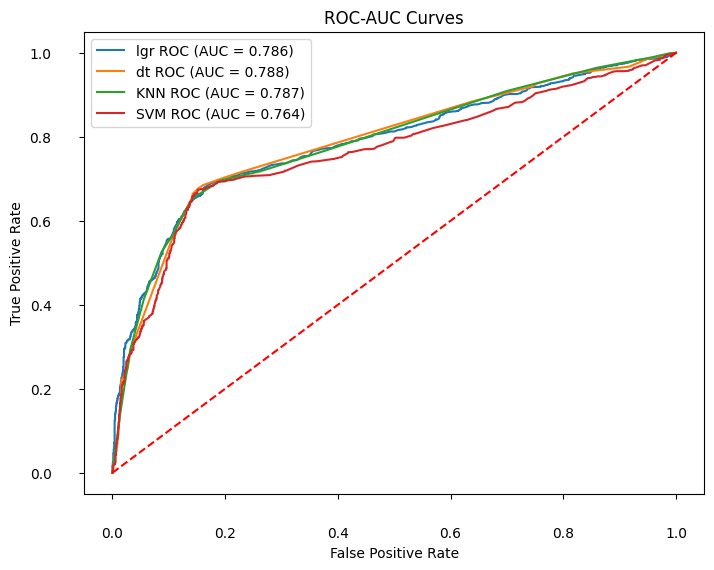

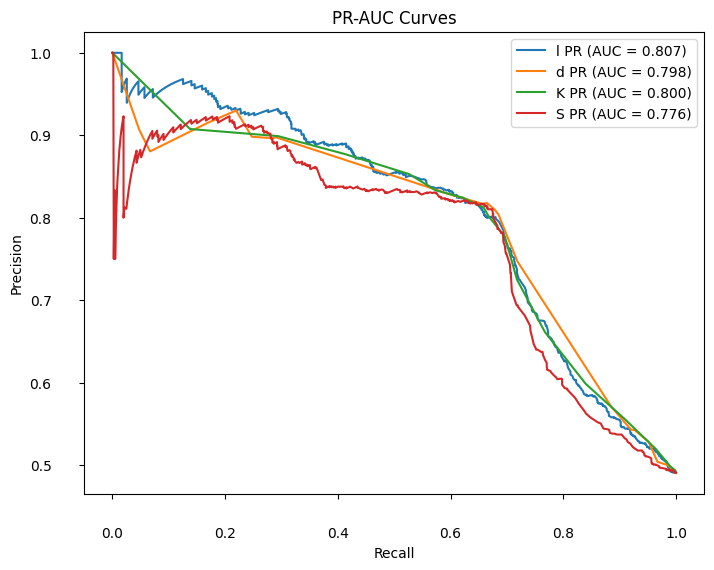

In [1126]:
# Plot all ROC-AUC curves
plt.figure(figsize=(8, 6))
for index, row in AUC.iterrows():
    name = row['name']
    fpr = row['ROC Curve'][0]
    tpr = row['ROC Curve'][1]
    roc_auc = row['ROC-AUC'][0]
    plt.plot(fpr, tpr, label=f'{name} ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()

# Plot all PR-AUC curves
plt.figure(figsize=(8, 6))
for index, row in AUC.iterrows():
    name = row['name'][0]
    precision = row['PR Curve'][0]
    recall = row['PR Curve'][1]
    pr_auc = row['PR-AUC']
    plt.plot(recall, precision, label=f'{name} PR (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-AUC Curves')
plt.legend()
plt.show()

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions